<a href="https://colab.research.google.com/github/alexwu0408/airline_reviews/blob/main/Copy_of_Airline_Review_Apr_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

### Import the data

In [2]:
os.environ['KAGGLE_USERNAME'] = "calvinstarrio"
os.environ['KAGGLE_KEY'] = "2be0bcb61263aea850daed85ffb012fb"

In [3]:
import kaggle

In [4]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('joelljungstrom/128k-airline-reviews',  force=True, unzip=True)


In [5]:
# Load the CSV file into a DataFrame
df = pd.read_csv('AirlineReviews.csv')

df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [6]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown', 'DatePub',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Review', 'Route',
       'SeatComfortRating', 'ServiceRating', 'Slug', 'Title', 'TravelType',
       'TripVerified', 'ValueRating', 'WifiRating', 'unique_id'],
      dtype='object')

In [7]:
df['AirlineName'].value_counts()

AirlineName
American Airlines                5509
Spirit Airlines                  4829
United Airlines                  4506
British Airways                  3541
Frontier Airlines                3136
                                 ... 
Hunnu Air                           1
BoraJet                             1
JC International Airlines           1
JetsuiteX                           1
Dynamic International Airways       1
Name: count, Length: 547, dtype: int64

### Handle the missing values

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column relative to the total number of rows
missing_values_percentage = round((df.isnull().sum() / len(df)) * 100, 2)

# Combine the counts and percentages into a DataFrame for a better display
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

print(missing_values_df)

                     Missing Values  Percentage (%)
Aircraft                      93032           71.86
AirlineName                       0            0.00
CabinType                      3018            2.33
DateFlown                     38462           29.71
DatePub                           0            0.00
EntertainmentRating               0            0.00
FoodRating                        0            0.00
GroundServiceRating               0            0.00
OriginCountry                  1678            1.30
OverallScore                   4331            3.35
Recommended                       0            0.00
Review                          824            0.64
Route                         38630           29.84
SeatComfortRating                 0            0.00
ServiceRating                     0            0.00
Slug                              0            0.00
Title                             4            0.00
TravelType                    38309           29.59
TripVerified

In [9]:
# Get unique values from the 'Aircraft' column and sort them alphabetically, excluding non-string values
unique_aircrafts = sorted(set(filter(lambda x: isinstance(x, str), df['Aircraft'].unique())))
print(unique_aircrafts)

[' ', ' A320', ' A320 NEO', ' A320-200', ' A321', ' A330', ' A330 neo / A320', ' A330-200', ' A330-300 /  Boeing B777-300ER', ' A330-300 / A330-200', ' A380-800', ' Boeing 737 / A320', ' Boeing 777  A320', ' CJ-800', ' CRJ-700 / Boeing 757-200', ' E190-E2', ' EMB95', '!', '-', '....', '1 x Boeing 777  3 x A380', '1 x Boeing 777-ER  1 x A380', '1029', '1352', '1429', '2374', '319', '320', '320 Airbus', '320 bus', '320/321', '321', '32A', '330', '330-200  767-400', '332', '350 & 787', '442', '442 I believe', '452', '5J 312', '6E7131', '7', '700 Series', '707', '717', '737', '737 800', '737 800 MAX', '737 Max', '737 Max8', '737- 800', '737-300', '737-700', '737-700 800', '737-700/800', '737-800', '737-800 Max', '737-800 winglet', '737-800(VT-JTN', '737-800/A388', '737-900', '737300', '738', '747', '747 400', '747 800', '747-400', '747-400 and A380', '747-800', '757', '757-200', '767', '767-300', '767-300ER', '773ER', '777', '777 200ER', '777-200', '777-200 & 789', '777-200 and 380', '777-

In [10]:
# Handle the column 'Aircraft'

# Function to determine the manufacturer based on aircraft model name
def determine_manufacturer_corrected(aircraft_name):
    if pd.isna(aircraft_name) or not aircraft_name.strip():
        return np.nan  # Return NaN for missing or empty strings
    aircraft_name = aircraft_name.lower().strip()  # Normalize the string
    if 'boeing' in aircraft_name or aircraft_name.startswith('b') or (aircraft_name[0] == '7' and len(aircraft_name) > 1 and aircraft_name[1].isdigit()):
        return 'Boeing'
    elif 'airbus' in aircraft_name or aircraft_name.startswith('a') or (aircraft_name[0] == '3' and len(aircraft_name) > 1 and aircraft_name[1].isdigit()):
        return 'Airbus'
    elif 'embraer' in aircraft_name or ('e' in aircraft_name and 'embraer' not in aircraft_name):
        return 'Embraer'
    elif 'bombardier' in aircraft_name or 'dash' in aircraft_name or 'crj' in aircraft_name:
        return 'Bombardier'
    else:
        return np.nan  # Return NaN for models not matching any known manufacturer or criteria

# Apply the corrected function to the dataset
df['Aircraft Manufacturer'] = df['Aircraft'].apply(determine_manufacturer_corrected)

# Recalculate the proportions of each manufacturer
corrected_manufacturer_proportions = df['Aircraft Manufacturer'].dropna().value_counts(normalize=True)

# Fill NaN values in 'Aircraft Manufacturer' based on the new proportions
manufacturers_corrected = corrected_manufacturer_proportions.index.tolist()
proportions_corrected = corrected_manufacturer_proportions.values.tolist()

missing_manufacturers_corrected = np.random.choice(manufacturers_corrected, size=df['Aircraft Manufacturer'].isna().sum(), p=proportions_corrected)
df.loc[df['Aircraft Manufacturer'].isna(), 'Aircraft Manufacturer'] = missing_manufacturers_corrected

# Display corrected proportions and verify there are no NaN values left
corrected_manufacturer_proportions, df['Aircraft Manufacturer'].isna().sum()


(Aircraft Manufacturer
 Boeing        0.500752
 Airbus        0.462884
 Embraer       0.028429
 Bombardier    0.007936
 Name: proportion, dtype: float64,
 0)

In [11]:
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Boeing
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Boeing
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing


In [12]:
# Drop the 'Aircraft' column from the dataframe
df = df.drop('Aircraft', axis=1)

# Verify the column is dropped by displaying the first few rows of the dataframe
df.head()

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer
0,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,yes,...,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Boeing
1,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,...,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer
2,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,...,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer
3,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,yes,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Boeing
4,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,no,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AirlineName            129455 non-null  object 
 1   CabinType              126437 non-null  object 
 2   DateFlown              90993 non-null   object 
 3   DatePub                129455 non-null  object 
 4   EntertainmentRating    129455 non-null  int64  
 5   FoodRating             129455 non-null  int64  
 6   GroundServiceRating    129455 non-null  int64  
 7   OriginCountry          127777 non-null  object 
 8   OverallScore           125124 non-null  float64
 9   Recommended            129455 non-null  object 
 10  Review                 128631 non-null  object 
 11  Route                  90825 non-null   object 
 12  SeatComfortRating      129455 non-null  int64  
 13  ServiceRating          129455 non-null  int64  
 14  Slug                   129455 non-nu

In [14]:
df['Route'].value_counts()

Route
Sydney to Melbourne              149
Melbourne to Sydney              144
Toronto to Vancouver             104
Vancouver to Toronto             104
Bangkok to Phuket                 73
                                ... 
Cologne to Edinburgh               1
Cologne to Hamburg                 1
Düsseldorf to Geneva               1
Phuket to Hamburg via Cologne      1
Paris Beauvais to Riga             1
Name: count, Length: 51401, dtype: int64

In [15]:
# Fill missing values for categorical columns with the mode'
categorical_columns = ['CabinType','OriginCountry', 'Route', 'TravelType']
for column in categorical_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)


# Standardize 'TripVerified' column and impute missing values based on existing distribution
df['TripVerified'] = df['TripVerified'].replace({'Trip Verified, Trip Verified': 'Trip Verified',
                                                  'Trip Verified,Trip Verified': 'Trip Verified',
                                                  'Not Verified, Not Verified': 'Not Verified',
                                                  'Chicago to Colorado Springs. Not Verified': 'Not Verified',
                                                  'NotVerified': 'Not Verified'})

trip_verified_ratio = df['TripVerified'].value_counts(normalize=True)

missing_trip_verified = df['TripVerified'].isnull().sum()

df.loc[df['TripVerified'].isnull(), 'TripVerified'] = np.random.choice(trip_verified_ratio.index,
                                                                       size=missing_trip_verified,
                                                                       p=trip_verified_ratio.values)

# Fill missing values in 'OverallScore' with the median
overall_score_median = df['OverallScore'].median()
df['OverallScore'].fillna(overall_score_median, inplace=True)


# Drop rows with missing values in 'Review' and 'OriginCountry'
df.dropna(subset=['Review', 'OriginCountry'], inplace=True)


# Format 'DatePub' to yyyy/mm/dd
df['DatePub'] = pd.to_datetime(df['DatePub'],format='mixed').dt.strftime('%Y/%m/%d')


# Format 'DateFlown' to yyyy/mm and impute missing values using 'DatePub' year and month
df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce').dt.to_period('M')
df['DatePubYearMonth'] = pd.to_datetime(df['DatePub']).dt.to_period('M')
df['DateFlown'].fillna(df['DatePubYearMonth'], inplace=True)
df.drop(columns=['DatePubYearMonth'], inplace=True)  # Clean up temporary column


<ipython-input-15-298f34010f33>:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce').dt.to_period('M')


In [16]:
# Check if there are any rows that don't contain " to "
invalid_rows = df['Route'].str.contains(" to ") == False

# Assuming all rows are valid and can be split into exactly two parts
try:
# Split the column, but only take the first and last split elements
    df['Route_Departure'] = df['Route'].apply(lambda x: x.split(" to ")[0])
    df['Route_Destination'] = df['Route'].apply(lambda x: x.split(" to ")[-1])
except ValueError as e:
    print(f"ValueError: {e}")

# Drop the 'Route' column from the dataframe
# df.drop('Route', axis=1, inplace=True)


In [17]:

df[df['Route_Departure'] == df['Route_Destination']]

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination
2490,Aeromexico,Economy Class,2018-10,2018/11/17,5,5,5,Canada,9.0,yes,...,aeromexico,enjoyed every bit of our trip,Couple Leisure,Trip Verified,5,5,295db4c9-ca14-4b50-b714-c5cd49513816,Airbus,Mexico City via Puerto Vallarta,Mexico City via Puerto Vallarta
4329,Aegean Airlines,Economy Class,2015-06,2015/06/12,0,4,0,UnitedKingdom,9.0,yes,...,aegean-airlines,Aegean Airlines customer review,Solo Leisure,Trip Verified,4,0,8917e839-5fe8-4bdb-9cda-a8b7534c6e8a,Airbus,LHR-ATH,LHR-ATH
4793,Aer Lingus,Economy Class,2015-06,2015/06/12,4,4,0,UnitedStates,9.0,yes,...,aer-lingus,Aer Lingus customer review,Solo Leisure,Trip Verified,5,0,1094dca7-46f3-4773-b4f1-697188cc6360,Airbus,"JFK-SNN-LHR, FCO-DUB-JFK","JFK-SNN-LHR, FCO-DUB-JFK"
5581,Air China,Economy Class,2015-06,2015/06/12,3,3,0,UnitedKingdom,6.0,yes,...,air-china,Air China customer review,Couple Leisure,Trip Verified,3,0,3f124f89-0545-4f79-a65f-eb8008e8f4a6,Boeing,LHR-HND via PEK,LHR-HND via PEK
5585,Air Canada rouge,Economy Class,2015-06,2015/06/12,2,0,0,HongKong,8.0,yes,...,air-canada-rouge,Air Canada rouge customer review,Couple Leisure,Trip Verified,5,0,59944d57-9a46-448b-a693-ef753f3ddcd0,Boeing,"YVR -SFO, LAX-YVR","YVR -SFO, LAX-YVR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125279,United Airlines,Economy Class,2018-02,2018/02/26,0,1,1,UnitedStates,1.0,no,...,united-airlines,United has always let me down,Couple Leisure,Trip Verified,1,0,8a5d7a77-2bdf-406d-b9e2-b40d1fd8e584,Boeing,Tulsa Sioux Falls,Tulsa Sioux Falls
126523,United Airlines,First Class,2015-06,2015/06/16,1,5,0,UnitedKingdom,9.0,yes,...,united-airlines,United Airlines customer review,Solo Leisure,Not Verified,5,0,5a8877e9-3310-459f-8a7d-9c8b14287448,Airbus,DEN-GRR,DEN-GRR
126536,United Airlines,Premium Economy,2015-06,2015/06/13,5,1,0,UnitedStates,7.0,yes,...,united-airlines,United Airlines customer review,Solo Leisure,Trip Verified,5,0,4feb090f-2c49-4df7-bd34-3141c90bc1c4,Boeing,TPA-IAD-LHR,TPA-IAD-LHR
126539,United Airlines,Economy Class,2015-06,2015/06/11,4,4,0,UnitedStates,8.0,yes,...,united-airlines,United Airlines customer review,Solo Leisure,Trip Verified,4,0,23c25597-06f6-4331-ba87-8f0869281401,Boeing,Newark - Tel Aviv,Newark - Tel Aviv


### Find the airlines whose overall rating is decreasing over time

In [18]:
# Ensure 'DatePub' is a datetime column
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Group data by 'AirlineName' and 'DatePub' year to calculate the mean 'OverallScore'
df_grouped = df.groupby(['AirlineName', df['DatePub'].dt.year])['OverallScore'].mean().reset_index()

# Identify airlines whose overall rating is decreasing over time
airlines_decreasing_trend = []

# Iterate through each airline to check if their overall rating is decreasing over time
for airline in df_grouped['AirlineName'].unique():
    df_airline = df_grouped[df_grouped['AirlineName'] == airline].sort_values(by='DatePub')
    if df_airline['OverallScore'].is_monotonic_decreasing:
        airlines_decreasing_trend.append(airline)

airlines_decreasing_trend

['AB Aviation',
 'ATA Airlines',
 'AeroItalia',
 'Air Antilles',
 'Air Burkina',
 'Air Costa',
 "Air Cote d'Ivoire",
 'Air Iceland Connect',
 'Air Labrador',
 'Air Malawi',
 'Air Rarotonga',
 'Alliance Air',
 'Andes Líneas Aéreas',
 'Ariana Afghan Airlines',
 'Armenia Air Company',
 'Auric Air',
 'Avelo Airlines',
 'Azur Air Germany',
 'Badr Airlines',
 'Bluebird Airways',
 'BoraJet',
 'Breeze Airways',
 'Buraq Air',
 'Camair-Co',
 'Cambodia Bayon Airlines',
 'Cobalt',
 'Dimonim Air',
 'Dynamic International Airways',
 'EWA Air',
 'Eastern Airlines',
 'Ernest Airlines',
 'Europe Airpost',
 'Evelop Airlines',
 'FLYONE',
 'FMI Air',
 'FlyArystan',
 'Go First',
 'Golden Myanmar Airlines',
 'Grand Cru Airlines',
 'Greater Bay Airlines',
 'Henan Airlines',
 'HiSky',
 'Himalaya Airlines',
 'Hunnu Air',
 'JC International Airlines',
 'JetsuiteX',
 'Jordan Aviation',
 'KD Air',
 'Kan Air',
 'LC Perú',
 'Lao Airlines',
 'Lubeck Air',
 'Lynx Air',
 'MAYAir',
 'MEGA Maldives Airlines',
 'Mack Air

In [19]:
len(df['AirlineName'].unique())

547

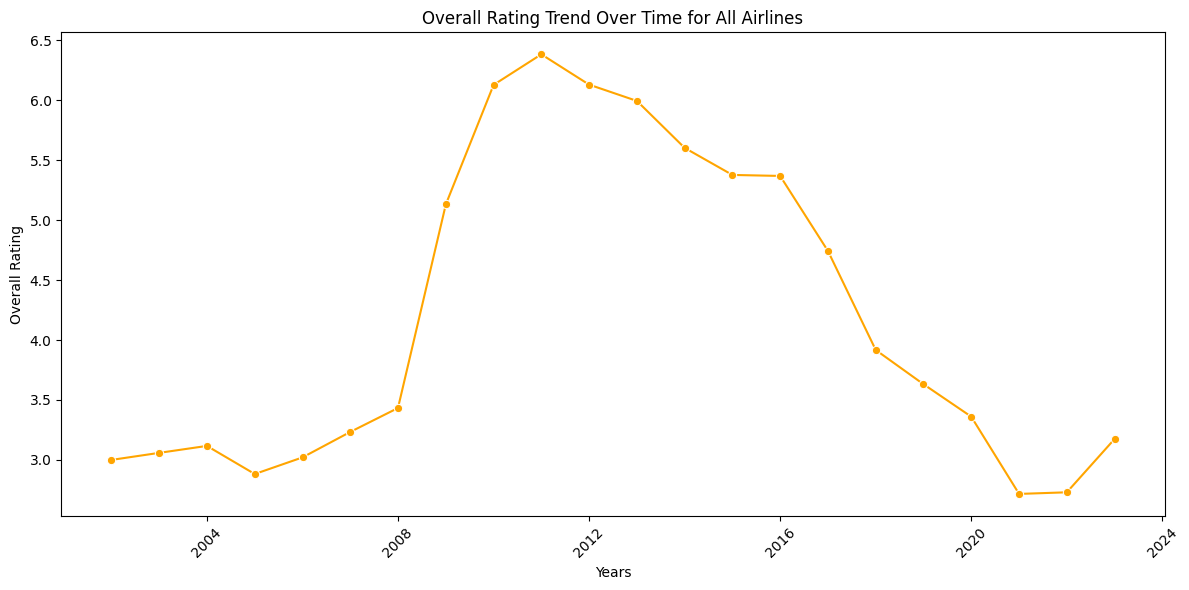

In [20]:
# Convert 'DatePub' to datetime format to facilitate grouping
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Group the dataset by year and calculate the mean 'OverallScore'
df_overall_trend = df.groupby(df['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()

# Convert 'DatePub' from Period to datetime for plotting
df_overall_trend['DatePub'] = df_overall_trend['DatePub'].dt.to_timestamp()

# Plot the trend of 'OverallScore' over time for all airlines combined
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_overall_trend, x='DatePub', y='OverallScore', marker='o', color='orange')
plt.title('Overall Rating Trend Over Time for All Airlines')
plt.xlabel('Years')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Select the airline with the most data points among all airlines whose overall ratings have declined over time for analysis.

<ipython-input-21-bfdb6fa296cf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_airline['DatePub'] = pd.to_datetime(df_selected_airline['DatePub'], errors='coerce')


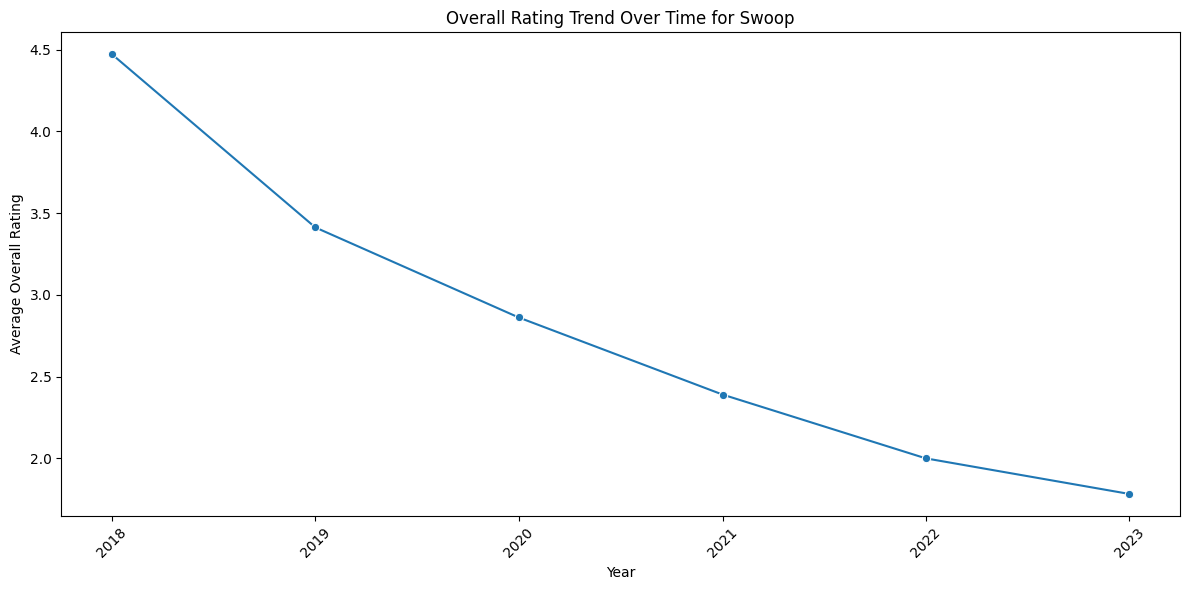

In [21]:
# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()

# Find the airline with the most data points from the decreasing trend list
airline_most_data_decreasing = data_points_per_airline.idxmax()

# Filter the DataFrame for the selected airline
df_selected_airline = df[df['AirlineName'] == airline_most_data_decreasing]

# Ensure 'DatePub' is a datetime column for grouping
df_selected_airline['DatePub'] = pd.to_datetime(df_selected_airline['DatePub'], errors='coerce')

# Group by year and calculate mean 'OverallScore'
df_selected_trend = df_selected_airline.groupby(df_selected_airline['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()


# Convert 'DatePub' from Period to datetime for plotting
df_selected_trend['DatePub'] = df_selected_trend['DatePub'].dt.to_timestamp()

# Plot the trend of 'OverallScore' over time for the selected airline
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_trend, x='DatePub', y='OverallScore', marker='o')
plt.title(f'Overall Rating Trend Over Time for {airline_most_data_decreasing}')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Correct the DatePub conversion to datetime format for the entire dataset
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()


# Correct the DatePub conversion to datetime format for the entire dataset
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()

# Find the airline with the most data points from the decreasing trend list
airline_most_data_decreasing = data_points_per_airline.idxmax()


print(f"{airline_most_data_decreasing} has the most data with {len(df_selected_airline)} points among all airlines whose overall ratings have declined over time")

Swoop has the most data with 701 points among all airlines whose overall ratings have declined over time


In [23]:
df_selected_trend

,DatePub,OverallScore
0,2018-01-01,4.470588
1,2019-01-01,3.412017
2,2020-01-01,2.861702
3,2021-01-01,2.390244
4,2022-01-01,2.000000
5,2023-01-01,1.782609


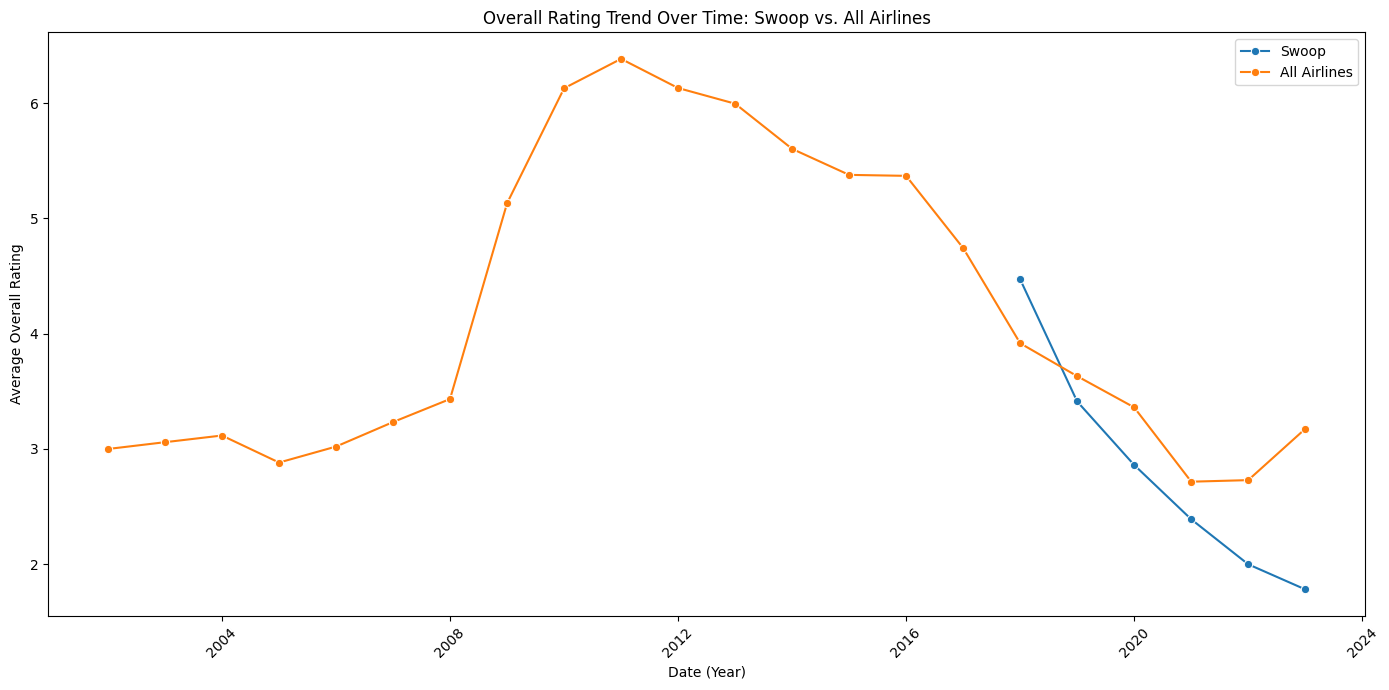

In [24]:
# Filter the DataFrame for the selected airline
df_selected_airline = df[df['AirlineName'] == airline_most_data_decreasing]

# Group the selected airline's data by year and quarter to calculate the mean 'OverallScore'
df_selected_trend = df_selected_airline.groupby(df_selected_airline['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()
df_selected_trend['DatePub'] = df_selected_trend['DatePub'].dt.to_timestamp()

# Group the overall data by year and quarter to calculate the mean 'OverallScore' for all airlines
df_overall_trend_all = df.groupby(df['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()
df_overall_trend_all['DatePub'] = df_overall_trend_all['DatePub'].dt.to_timestamp()

# Now let's plot both trends: Selected airline vs. All airlines
plt.figure(figsize=(14, 7))

# Plot for the selected airline
sns.lineplot(data=df_selected_trend, x='DatePub', y='OverallScore', marker='o', label=airline_most_data_decreasing)

# Plot for all airlines
sns.lineplot(data=df_overall_trend_all, x='DatePub', y='OverallScore', marker='o', label='All Airlines')

plt.title(f'Overall Rating Trend Over Time: {airline_most_data_decreasing} vs. All Airlines')
plt.xlabel('Date (Year)')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### EDA

In [25]:
df_swoop = df[df['AirlineName']=='Swoop']

# Sentiment Analysis

### NLTK (Vader Lexicon)

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment_polarity(text):
    scores = sid.polarity_scores(text)
    return 1 if scores['compound'] >=0 else 0



# Get the sentiment score
df_swoop['Review_score_nltk'] = df_swoop['Review'].apply(get_sentiment_polarity)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-26-ff2aa0c201c0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['Review_score_nltk'] = df_swoop['Review'].apply(get_sentiment_polarity)


In [27]:
df_swoop

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination,Review_score_nltk
105641,Swoop,Economy Class,2023-05,2023-05-07,0,0,5,Canada,8.0,yes,...,Staff was very nice,Couple Leisure,Trip Verified,5,0,8d3f5ea6-8ac4-40d8-a2a5-e71a0c7b9ba9,Boeing,Victoria,Toronto,1
105648,Swoop,Economy Class,2023-05,2023-05-02,0,3,2,Canada,3.0,no,...,one of the most unreliable airlines out there,Family Leisure,Trip Verified,2,0,74920751-8549-4c53-8fc9-b1236b8f86d7,Boeing,Toronto,Cancún,1
105649,Swoop,Economy Class,2023-04,2023-04-30,0,0,1,Canada,1.0,no,...,"disgusted, outraged, exhausted",Couple Leisure,Not Verified,1,0,e0367294-1d0d-44e1-af85-6f8cb41b365b,Boeing,Vardero,Vancouver via Toronto,0
105650,Swoop,Economy Class,2023-03,2023-04-27,0,0,4,Canada,3.0,no,...,Swoop has the worst customer service,Couple Leisure,Not Verified,2,0,84ccbde4-5b07-46ab-8017-0b2ffea165f9,Boeing,Hamilton,Clearwater,0
105651,Swoop,Economy Class,2023-03,2023-04-25,0,0,1,Canada,1.0,no,...,I am shocked by poorly this has been handled,Couple Leisure,Trip Verified,1,0,ddc82671-005f-48b2-8d74-e18bb9e667fe,Boeing,Toronto,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107402,Swoop,Economy Class,2018-06,2018-07-05,0,0,1,Canada,1.0,no,...,last experience with Swoop,Solo Leisure,Trip Verified,2,0,e039fd2b-15a9-4ef4-9f2c-5f32c88f5b8f,Boeing,Winnipeg,Hamilton,0
107403,Swoop,Economy Class,2018-06,2018-07-05,4,0,4,Canada,9.0,yes,...,The pricing was amazing,Solo Leisure,Trip Verified,5,0,4dcbf41d-d234-478a-ad50-2e2f6f2db3fe,Boeing,Hamilton,Halifax,1
107404,Swoop,Economy Class,2018-07,2018-07-04,4,0,4,Canada,9.0,yes,...,really enjoyed our flight,Couple Leisure,Trip Verified,5,2,270ea112-66d2-4029-b899-2f2f91e551c4,Airbus,Abbotsford,Hamilton,1
107405,Swoop,Economy Class,2018-06,2018-06-28,0,0,1,Canada,1.0,no,...,how uncompassionate they were,Couple Leisure,Trip Verified,1,0,4ee0362a-31d9-45ad-a4f1-96452e6c27d4,Airbus,Hamilton,Halifax,0


### Flair

In [28]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-n

In [29]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')

def get_score(text):
    sentence = Sentence(text)
    classifier.predict(sentence)

    return 1 if sentence.labels[0].value =='POSITIVE' else 0


df_swoop['Review_score_flair'] = df_swoop['Review'].apply(get_score)

ModuleNotFoundError: No module named 'flair'

Flair is time consuming compared to other models.

### Transformer Model

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", truncation=True)
def get_score(text):
    sentence = sentiment_pipeline(text)
    return 1 if sentence[0]['label'] =='POSITIVE' else 0

df_swoop['Review_score'] = df_swoop['Review'].apply(get_score)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

<ipython-input-31-9255acecb90a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['Review_score'] = df_swoop['Review'].apply(get_score)


In [ ]:
df_swoop[['Review_score', 'Review', 'OverallScore']]

,Review_score,Review,OverallScore
105641,1,It all went smooth. The price was 1/3 of the m...,8.0
105648,0,Swoop is one of the most unreliable airlines o...,3.0
105649,0,"We tried to fly out of Varadero, Cuba yesterda...",1.0
105650,0,Swoop has the worst customer service. There ab...,3.0
105651,0,I wish that I had paid attention to the bad re...,1.0
...,...,...,...
107402,0,This is my very first experience with Swoop an...,1.0
107403,0,The pricing was amazing. The pricing was amazi...,9.0
107404,1,Abbotsford to Hamilton. We really enjoyed our ...,9.0
107405,0,"Hamilton to Halifax. I have flown a lot, and n...",1.0


In [ ]:
#positive negative sentiment distribution
df_swoop['Review_score'].value_counts()

0    566
1    135
Name: Review_score, dtype: int64

## Data Exploration

In [ ]:
#convert dataflow frmo periodic to Year wise
df_swoop['DateFlown'] = df_swoop['DateFlown'].dt.to_timestamp(freq='Y')

<ipython-input-34-aa9a5d2d6d82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swoop['DateFlown'] = df_swoop['DateFlown'].dt.to_timestamp(freq='Y')


In [ ]:
df_swoop.corr()

<ipython-input-35-14f13c6d16d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_swoop.corr()


,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,Review_score_nltk,Review_score_flair,Review_score
EntertainmentRating,1.000000,0.250873,0.283044,0.283316,0.271787,0.279000,0.296828,0.702422,0.197092,0.278544,0.232286
FoodRating,0.250873,1.000000,0.446404,0.439388,0.432143,0.453412,0.438522,0.222516,0.263710,0.404865,0.356169
GroundServiceRating,0.283044,0.446404,1.000000,0.883437,0.784323,0.810432,0.860559,0.342362,0.526932,0.808536,0.767830
OverallScore,0.283316,0.439388,0.883437,1.000000,0.756326,0.787345,0.910587,0.335494,0.603154,0.905187,0.872362
SeatComfortRating,0.271787,0.432143,0.784323,0.756326,1.000000,0.863021,0.737987,0.344224,0.425738,0.679855,0.640806
ServiceRating,0.279000,0.453412,0.810432,0.787345,0.863021,1.000000,0.767193,0.336300,0.464702,0.695267,0.663578
ValueRating,0.296828,0.438522,0.860559,0.910587,0.737987,0.767193,1.000000,0.351201,0.566352,0.835052,0.786450
WifiRating,0.702422,0.222516,0.342362,0.335494,0.344224,0.336300,0.351201,1.000000,0.232199,0.299799,0.288808
Review_score_nltk,0.197092,0.263710,0.526932,0.603154,0.425738,0.464702,0.566352,0.232199,1.000000,0.582482,0.585407
Review_score_flair,0.278544,0.404865,0.808536,0.905187,0.679855,0.695267,0.835052,0.299799,0.582482,1.000000,0.873138


<Axes: xlabel='DateFlown', ylabel='Review_score'>

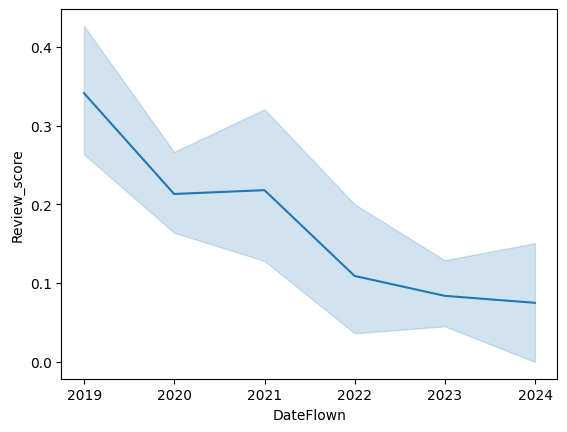

In [ ]:
sns.lineplot(x='DateFlown', y='Review_score', data=df_swoop)

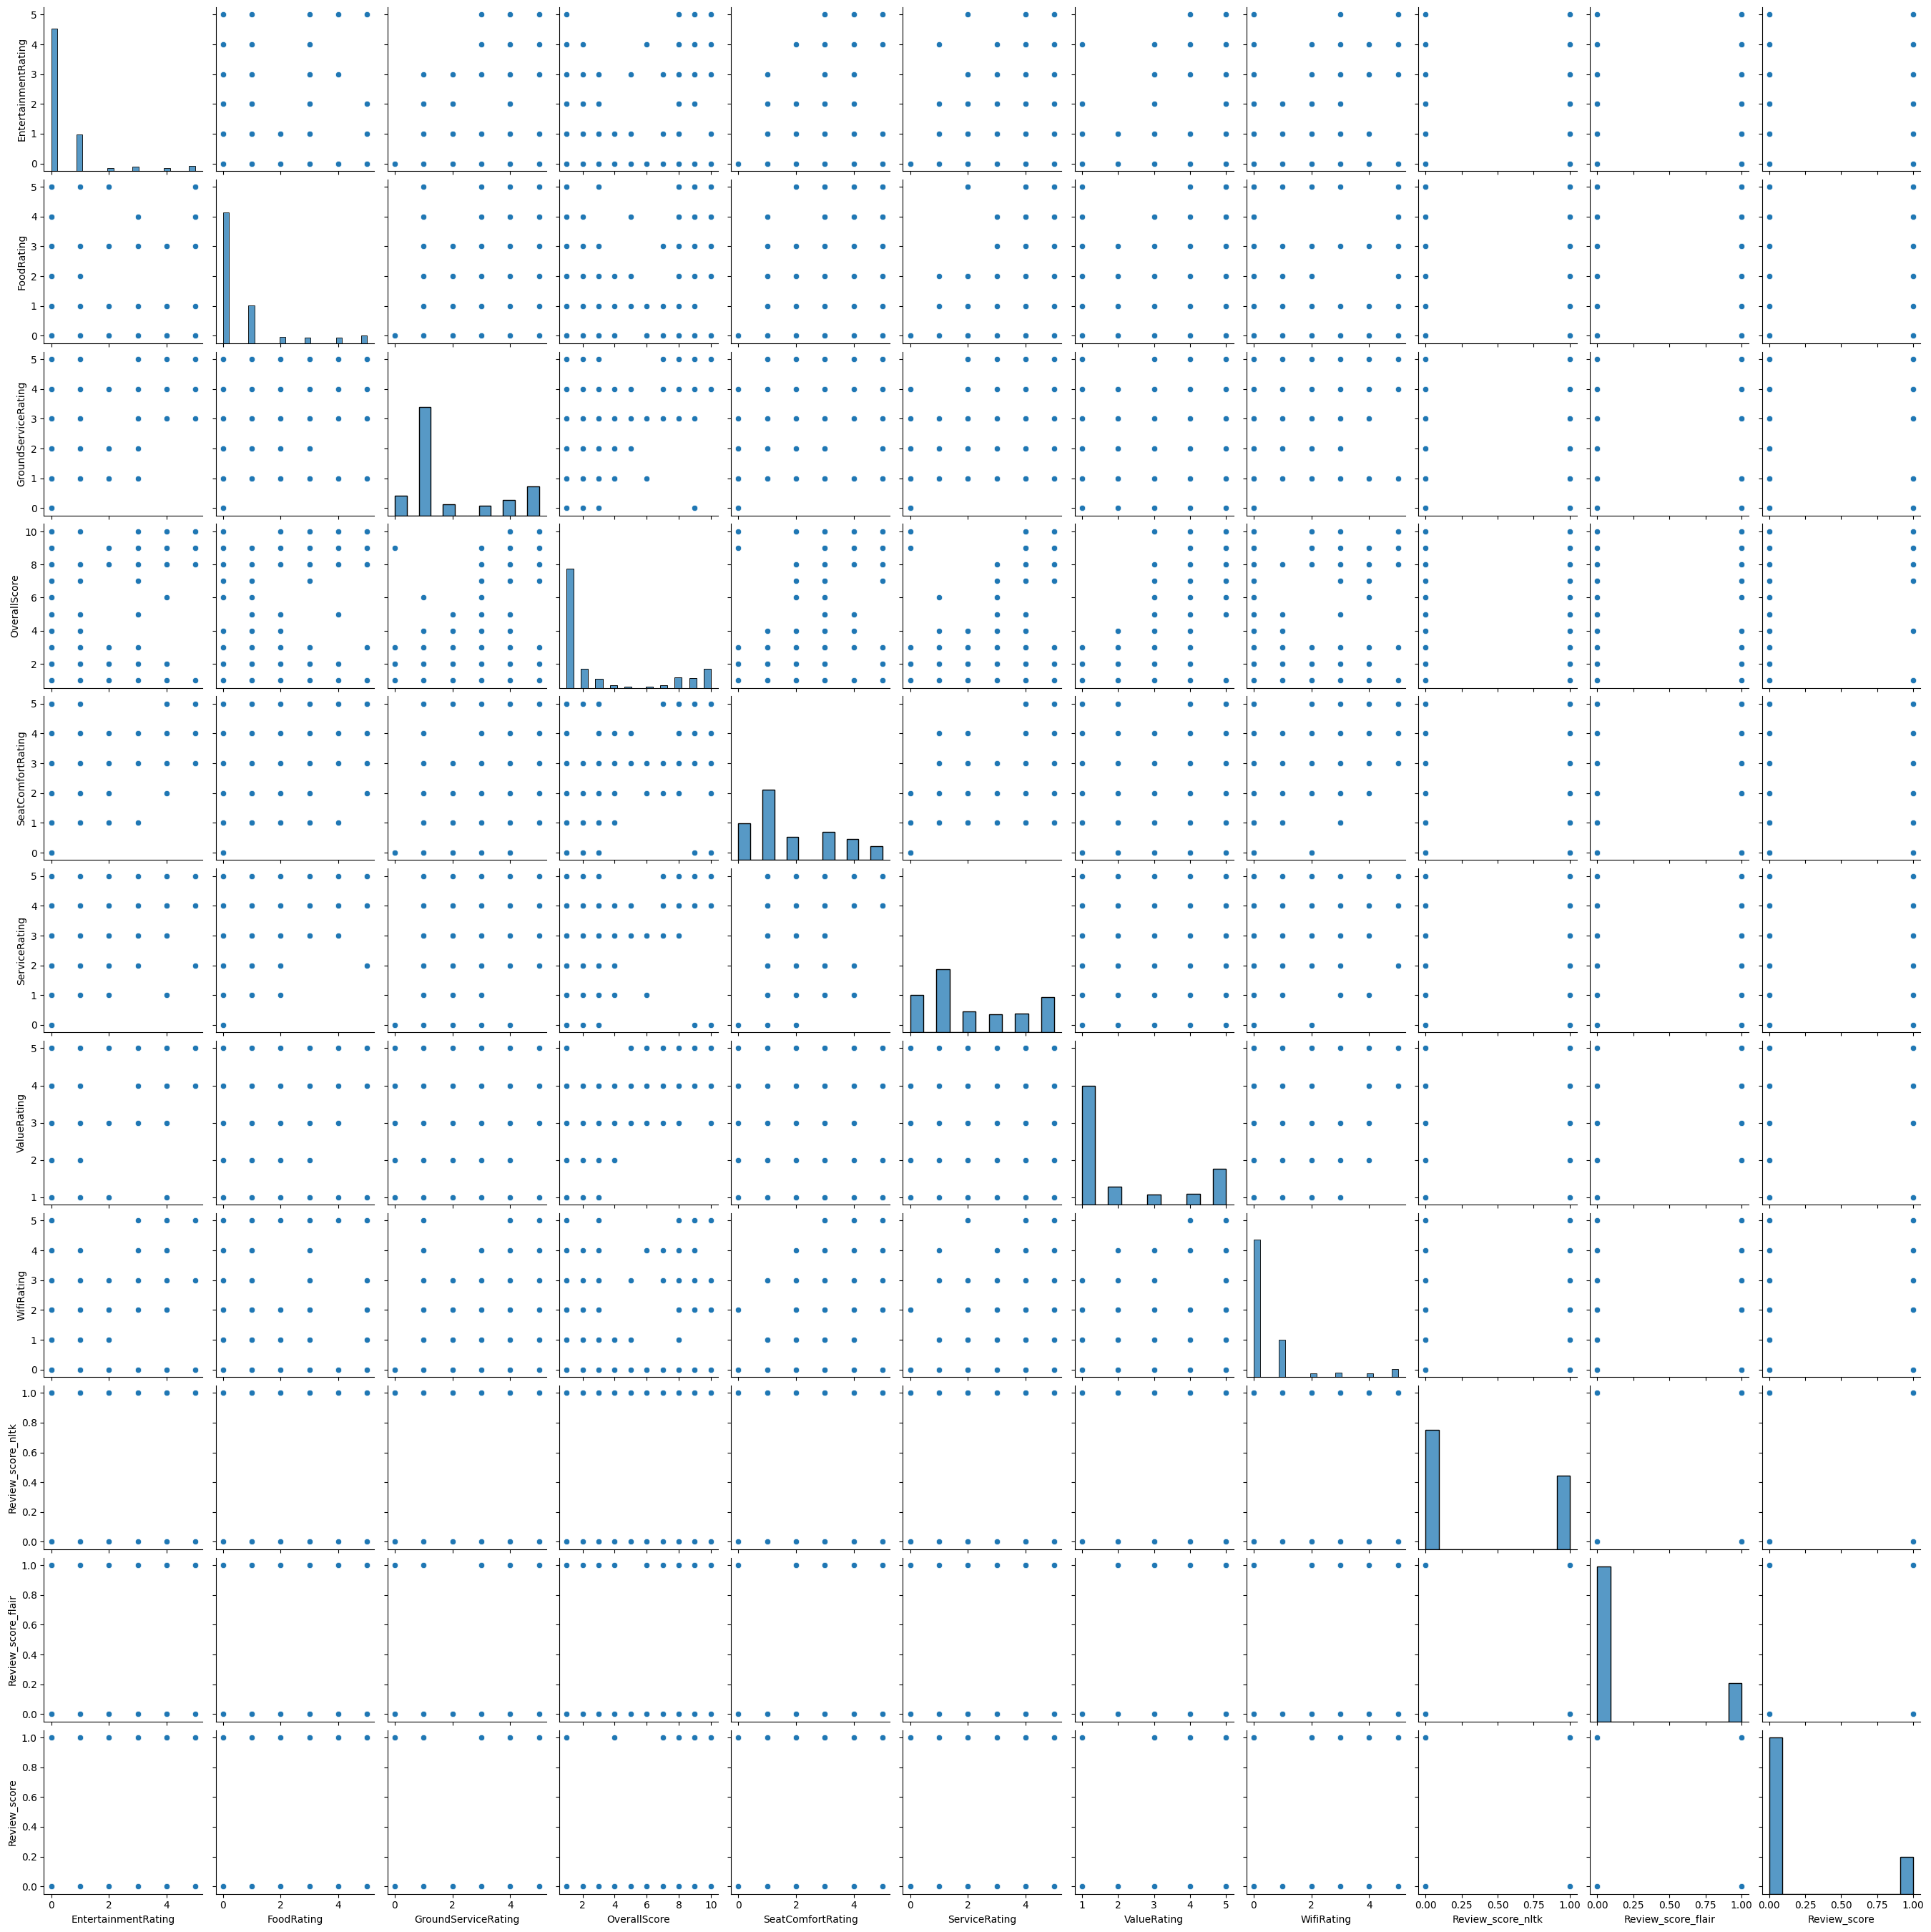

In [ ]:
sns.pairplot(df_swoop)

<ipython-input-38-ff7b185518f4>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(reordered_data.corr(),annot=True)


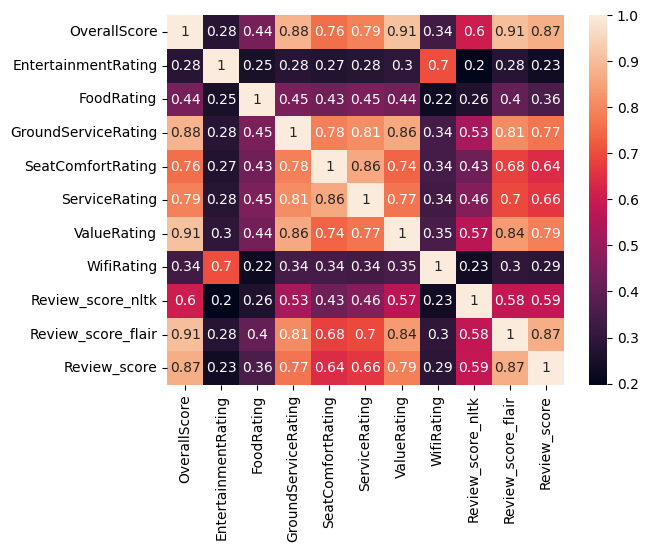

In [ ]:
#heat map with OverallScore as first column
column_to_start = 'OverallScore'

# New column order with the specified column at the start
new_columns = [column_to_start] + [col for col in df_swoop.columns if col != column_to_start]

# Rearrange data according to the new column order
reordered_data = df_swoop[new_columns]


# Create heatmap
sns.heatmap(reordered_data.corr(),annot=True)
plt.show()

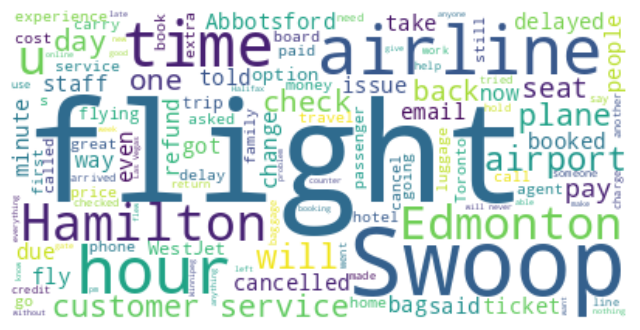

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud( background_color="white").generate(' '.join(df_swoop['Review'].astype(str))
)

# Display the generated word cloud image
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
df_swoop.to_csv("Swoop_airlines.csv")

In [71]:
!git clone https://github.com/alexwu0408/airline_reviews

fatal: destination path 'airline_reviews' already exists and is not an empty directory.


In [189]:
df_swoop = pd.read_csv("/content/airline_reviews/data/Swoop_airlines.csv")

In [108]:
df_swoop

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination,Review_score_nltk,Review_score_flair,Review_score
0,Swoop,Economy Class,2023-12-31,2023-05-07,0,0,5,Canada,8.0,yes,...,Trip Verified,5,0,8d3f5ea6-8ac4-40d8-a2a5-e71a0c7b9ba9,Boeing,Victoria,Toronto,1,1,1
1,Swoop,Economy Class,2023-12-31,2023-05-02,0,3,2,Canada,3.0,no,...,Trip Verified,2,0,74920751-8549-4c53-8fc9-b1236b8f86d7,Bombardier,Toronto,Cancún,1,0,0
2,Swoop,Economy Class,2023-12-31,2023-04-30,0,0,1,Canada,1.0,no,...,Not Verified,1,0,e0367294-1d0d-44e1-af85-6f8cb41b365b,Boeing,Vardero,Vancouver via Toronto,0,0,0
3,Swoop,Economy Class,2023-12-31,2023-04-27,0,0,4,Canada,3.0,no,...,Not Verified,2,0,84ccbde4-5b07-46ab-8017-0b2ffea165f9,Airbus,Hamilton,Clearwater,0,0,0
4,Swoop,Economy Class,2023-12-31,2023-04-25,0,0,1,Canada,1.0,no,...,Trip Verified,1,0,ddc82671-005f-48b2-8d74-e18bb9e667fe,Embraer,Toronto,Cuba,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Swoop,Economy Class,2018-12-31,2018-07-05,0,0,1,Canada,1.0,no,...,Trip Verified,2,0,e039fd2b-15a9-4ef4-9f2c-5f32c88f5b8f,Boeing,Winnipeg,Hamilton,0,0,0
697,Swoop,Economy Class,2018-12-31,2018-07-05,4,0,4,Canada,9.0,yes,...,Trip Verified,5,0,4dcbf41d-d234-478a-ad50-2e2f6f2db3fe,Boeing,Hamilton,Halifax,1,1,0
698,Swoop,Economy Class,2018-12-31,2018-07-04,4,0,4,Canada,9.0,yes,...,Trip Verified,5,2,270ea112-66d2-4029-b899-2f2f91e551c4,Airbus,Abbotsford,Hamilton,1,1,1
699,Swoop,Economy Class,2018-12-31,2018-06-28,0,0,1,Canada,1.0,no,...,Trip Verified,1,0,4ee0362a-31d9-45ad-a4f1-96452e6c27d4,Boeing,Hamilton,Halifax,0,0,0


In [109]:
df_swoop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AirlineName            701 non-null    object 
 1   CabinType              701 non-null    object 
 2   DateFlown              701 non-null    object 
 3   DatePub                701 non-null    object 
 4   EntertainmentRating    701 non-null    int64  
 5   FoodRating             701 non-null    int64  
 6   GroundServiceRating    701 non-null    int64  
 7   OriginCountry          701 non-null    object 
 8   OverallScore           701 non-null    float64
 9   Recommended            701 non-null    object 
 10  Review                 701 non-null    object 
 11  SeatComfortRating      701 non-null    int64  
 12  ServiceRating          701 non-null    int64  
 13  Slug                   701 non-null    object 
 14  Title                  701 non-null    object 
 15  Travel

In [6]:
# dir(df_swoop['Route_Departure'].value_counts().head(10))
df_swoop['Route_Departure'].value_counts().head(10).index.tolist()

['Hamilton',
 'Edmonton',
 'Abbotsford',
 'Toronto',
 'Winnipeg',
 'Halifax',
 'London',
 'Las Vegas',
 'Kelowna',
 'Cancun']

In [7]:
temp = df_swoop[df_swoop['Route_Destination'].isin(df_swoop['Route_Destination'].value_counts().head(10).index.tolist())]

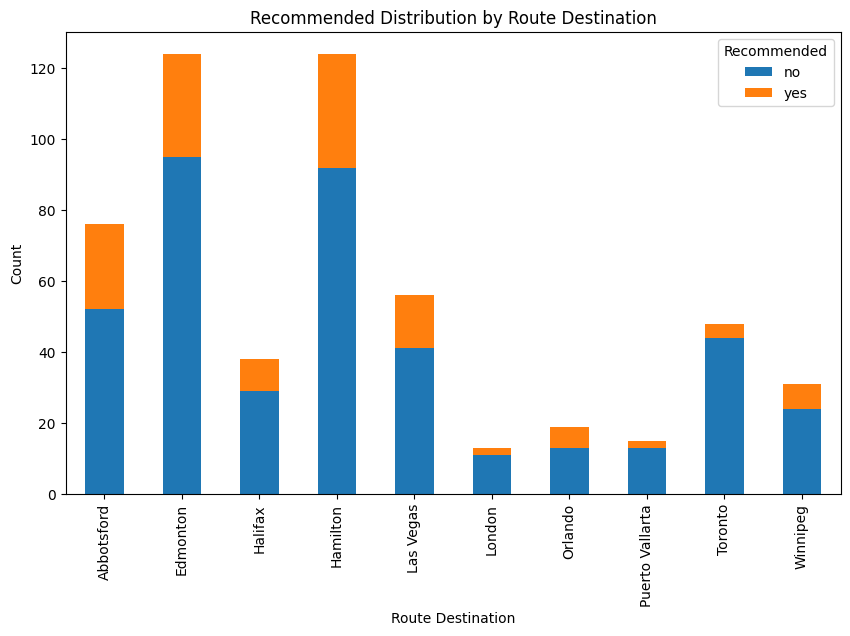

In [8]:
grouped_data = temp.groupby(['Route_Destination'])['Recommended'].value_counts().unstack(fill_value=0)

# Create bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set plot labels and title
plt.title('Recommended Distribution by Route Destination')
plt.xlabel('Route Destination')
plt.ylabel('Count')

# Show plot
plt.show()

In [9]:
df_swoop

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination,Review_score_nltk,Review_score_flair,Review_score
0,Swoop,Economy Class,2023-12-31,2023-05-07,0,0,5,Canada,8.0,yes,...,Trip Verified,5,0,8d3f5ea6-8ac4-40d8-a2a5-e71a0c7b9ba9,Boeing,Victoria,Toronto,1,1,1
1,Swoop,Economy Class,2023-12-31,2023-05-02,0,3,2,Canada,3.0,no,...,Trip Verified,2,0,74920751-8549-4c53-8fc9-b1236b8f86d7,Bombardier,Toronto,Cancún,1,0,0
2,Swoop,Economy Class,2023-12-31,2023-04-30,0,0,1,Canada,1.0,no,...,Not Verified,1,0,e0367294-1d0d-44e1-af85-6f8cb41b365b,Boeing,Vardero,Vancouver via Toronto,0,0,0
3,Swoop,Economy Class,2023-12-31,2023-04-27,0,0,4,Canada,3.0,no,...,Not Verified,2,0,84ccbde4-5b07-46ab-8017-0b2ffea165f9,Airbus,Hamilton,Clearwater,0,0,0
4,Swoop,Economy Class,2023-12-31,2023-04-25,0,0,1,Canada,1.0,no,...,Trip Verified,1,0,ddc82671-005f-48b2-8d74-e18bb9e667fe,Embraer,Toronto,Cuba,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Swoop,Economy Class,2018-12-31,2018-07-05,0,0,1,Canada,1.0,no,...,Trip Verified,2,0,e039fd2b-15a9-4ef4-9f2c-5f32c88f5b8f,Boeing,Winnipeg,Hamilton,0,0,0
697,Swoop,Economy Class,2018-12-31,2018-07-05,4,0,4,Canada,9.0,yes,...,Trip Verified,5,0,4dcbf41d-d234-478a-ad50-2e2f6f2db3fe,Boeing,Hamilton,Halifax,1,1,0
698,Swoop,Economy Class,2018-12-31,2018-07-04,4,0,4,Canada,9.0,yes,...,Trip Verified,5,2,270ea112-66d2-4029-b899-2f2f91e551c4,Airbus,Abbotsford,Hamilton,1,1,1
699,Swoop,Economy Class,2018-12-31,2018-06-28,0,0,1,Canada,1.0,no,...,Trip Verified,1,0,4ee0362a-31d9-45ad-a4f1-96452e6c27d4,Boeing,Hamilton,Halifax,0,0,0


EntertainmentRating
FoodRating
GroundServiceRating
SeatComfortRating
ServiceRating
ValueRating
WifiRating


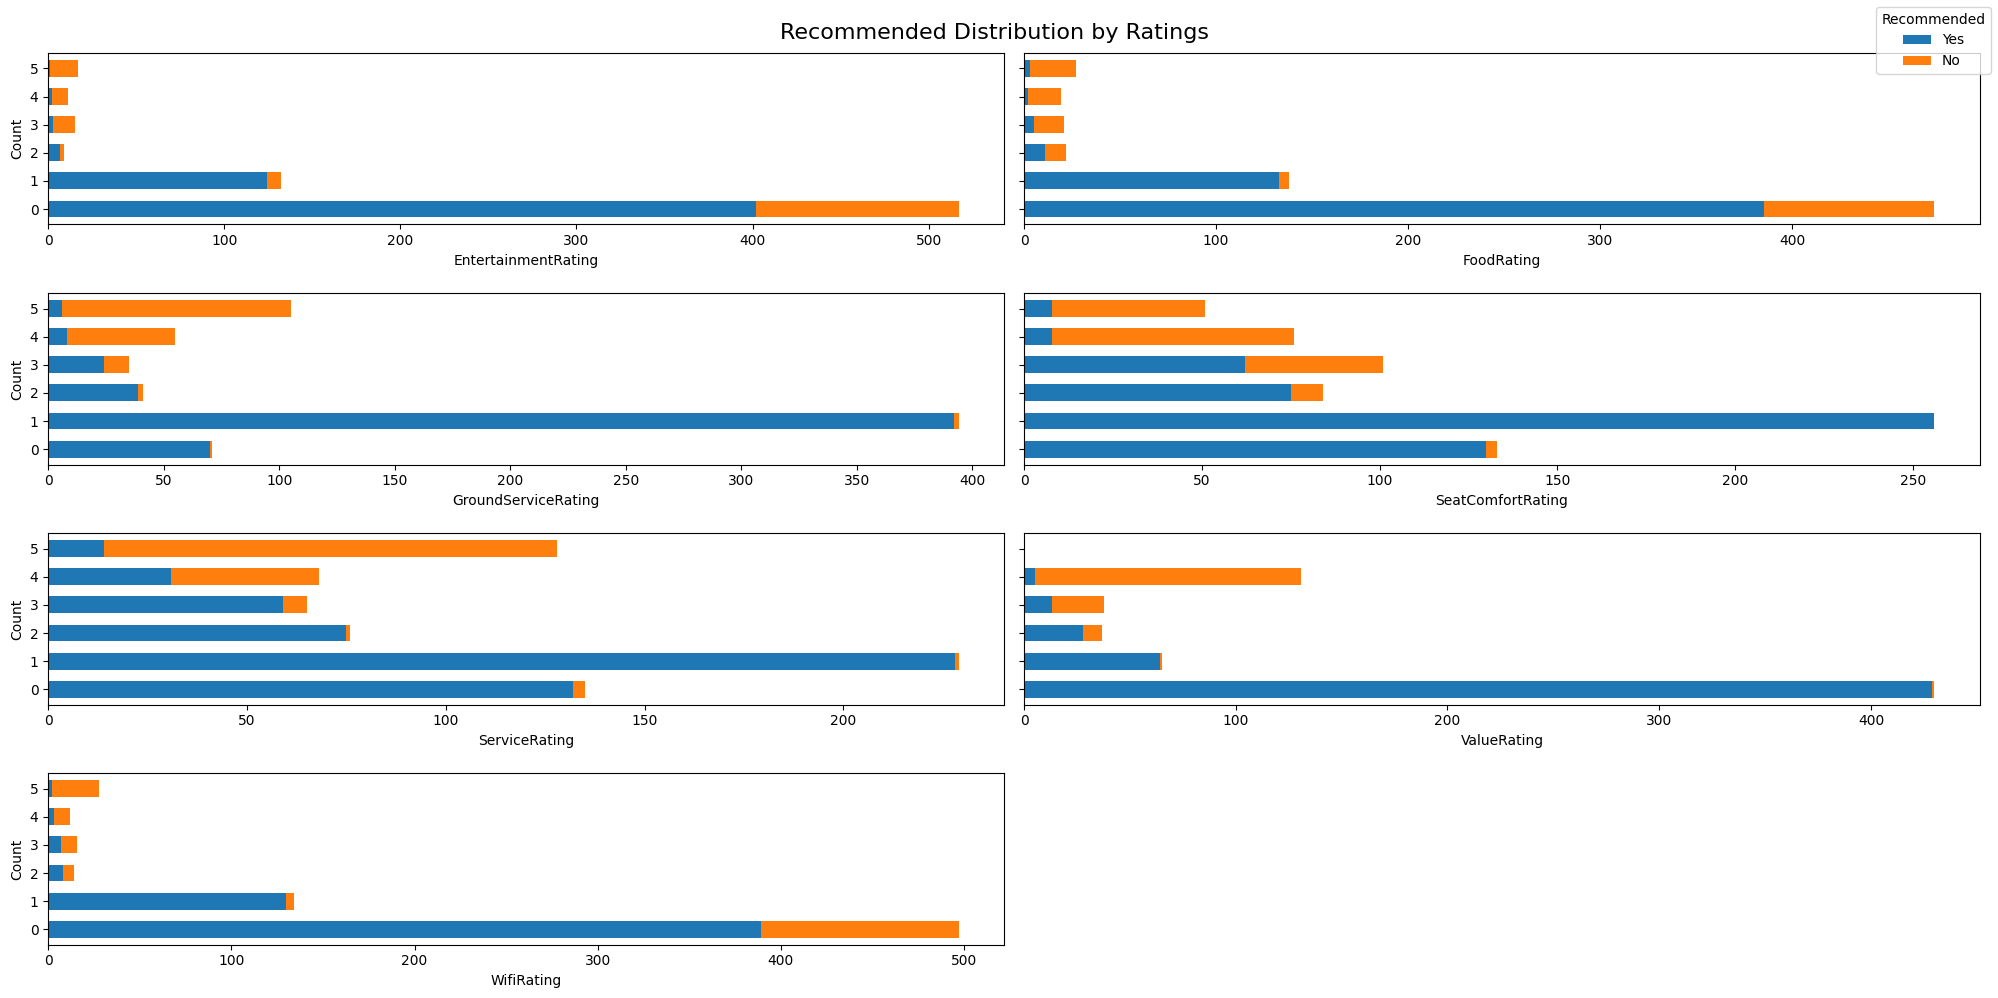

In [10]:
columns = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']
fig, axs = plt.subplots(4,2, figsize=(20, 10), sharey=True)
axs = axs.flatten()

for i, column in enumerate(columns):
    grouped_data = df_swoop.groupby([column])['Recommended'].value_counts().unstack(fill_value=0)
    # Create bar plot

    print(column)
    grouped_data.plot(kind='barh', stacked=True, ax=axs[i], legend=False, label=column, align='center', width=0.6)

    # Set plot labels and title
    axs[i].set_xlabel(f"{column}")
    axs[i].set_ylabel('Count')

    # Show plot
    # axs[i].set_xticklabels(grouped_data.index, rotation=0)
    # axs[i].tick_params(axis='x', rotation=0)

fig.legend(labels=['Yes', 'No'], title='Recommended')
fig.suptitle('Recommended Distribution by Ratings', fontsize=16)



fig.delaxes(axs[-1])

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.show()
# EntertainmentRating	FoodRating	GroundServiceRating

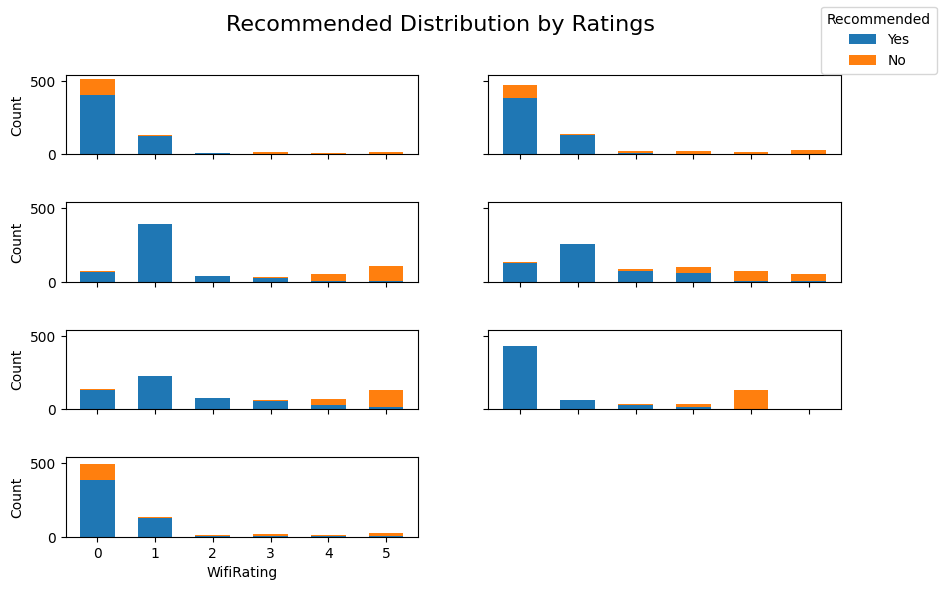

In [11]:
columns = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']

fig, axs = plt.subplots(4, 2, figsize=(15, 20), sharex=True, sharey=True)
axs = axs.flatten()

for i, column in enumerate(columns):
    grouped_data = df_swoop.groupby([column])['Recommended'].value_counts().unstack(fill_value=0)

    # Create bar plot with reduced stack width and adjusted distance between stacks
    grouped_data.plot(kind='bar', stacked=True, ax=axs[i], color=['#1f77b4', '#ff7f0e'], figsize=(10, 6), legend=False, width=0.6, align='center')

    # Set plot labels and title
    # axs[i].set_title(f'Recommended Distribution by {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

    # Set x-ticks rotation for better readability
    axs[i].tick_params(axis='x', rotation=0)

# Remove the last empty subplot
fig.delaxes(axs[-1])

# Create a single title for the entire figure
fig.suptitle('Recommended Distribution by Ratings', fontsize=16)

# Create a single legend outside the subplots
fig.legend(labels=['Yes', 'No'], loc='upper right', title='Recommended')

# Adjust layout and spacing
plt.subplots_adjust(hspace=0.6)

# Show plot
plt.show()

## Tinkering with models

In [247]:
df_swoop = pd.read_csv("/content/airline_reviews/data/Swoop_airlines.csv")


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Dummy Model

In [288]:
from sklearn.dummy import DummyClassifier

df_swoop['Recommended_bin'] = np.where(df_swoop['Recommended'] == 'yes', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(df_swoop.drop('Recommended_bin', axis=1), df_swoop['Recommended_bin'], test_size=0.3, random_state=42)
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

In [289]:
accuracy_score(dummy_pred, y_test)

0.7677725118483413

### Positive v/s Negative Class

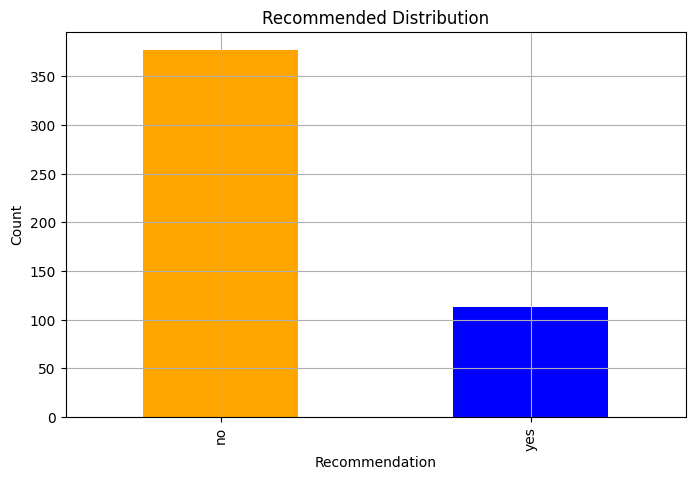

In [251]:
plt.figure(figsize=(8, 5))
y_train.map({0: 'no', 1:'yes'}).value_counts().plot(x=['no', 'yes'], kind='bar', color=['orange', 'blue'], xlabel='Recommendation', ylabel='Count')
plt.title("Recommended Distribution")
plt.grid()
plt.show()

In [252]:
df_swoop['Recommended']

0      yes
1       no
2       no
3       no
4       no
      ... 
696     no
697    yes
698    yes
699     no
700     no
Name: Recommended, Length: 701, dtype: object

In [253]:
# positive_class = df_swoop.query('Recommended==1')
# negative_class = df_swoop.query('Recommended==0').sample(len(positive_class))

In [254]:
positive_class

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination,Review_score_nltk,Review_score_flair,Review_score,Recommended_bin,Month


In [286]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Data Wrangling

In [256]:
#drop rows where DatePub has erroneous value
df_swoop = df_swoop[df_swoop['DatePub'] != 'Other']

In [257]:
#convert data to month and year
df_swoop['Month'] = pd.to_datetime(df_swoop['DatePub'], format="%Y-%m-%d").dt.month
df_swoop['Year'] = pd.to_datetime(df_swoop['DatePub']).dt.year

#convert recommended column to bin
df_swoop['Recommended_bin']= np.where(df_swoop['Recommended'] == 'yes', 1, 0)

df_swoop.loc[~df_swoop['OriginCountry'].isin(['Canada', 'UnitedStates']), 'OriginCountry'] = 'Other'


In [215]:
df_swoop['OriginCountry'].value_counts()

OriginCountry
Canada          682
UnitedStates     14
Other             5
Name: count, dtype: int64

In [260]:
#drop columns

df_swoop.drop(columns=['Route_Departure', 'Route_Destination', 'unique_id', 'AirlineName', 'DateFlown', 'Slug', 'Review_score_nltk',  'Review_score_flair', 'Review', 'DatePub', 'Title'], axis=1, inplace=True)


In [261]:
df_swoop.head()

,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,Aircraft Manufacturer,Review_score,Recommended_bin,Month,Year
0,Economy Class,0,0,5,Canada,8.0,yes,4,5,Couple Leisure,Trip Verified,5,0,Boeing,1,1,5,2023
1,Economy Class,0,3,2,Canada,3.0,no,3,5,Family Leisure,Trip Verified,2,0,Bombardier,0,0,5,2023
2,Economy Class,0,0,1,Canada,1.0,no,1,1,Couple Leisure,Not Verified,1,0,Boeing,0,0,4,2023
3,Economy Class,0,0,4,Canada,3.0,no,2,4,Couple Leisure,Not Verified,2,0,Airbus,0,0,4,2023
4,Economy Class,0,0,1,Canada,1.0,no,3,3,Couple Leisure,Trip Verified,1,0,Embraer,0,0,4,2023


In [262]:
df_swoop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CabinType              701 non-null    object 
 1   EntertainmentRating    701 non-null    int64  
 2   FoodRating             701 non-null    int64  
 3   GroundServiceRating    701 non-null    int64  
 4   OriginCountry          701 non-null    object 
 5   OverallScore           701 non-null    float64
 6   Recommended            701 non-null    object 
 7   SeatComfortRating      701 non-null    int64  
 8   ServiceRating          701 non-null    int64  
 9   TravelType             701 non-null    object 
 10  TripVerified           701 non-null    object 
 11  ValueRating            701 non-null    int64  
 12  WifiRating             701 non-null    int64  
 13  Aircraft Manufacturer  701 non-null    object 
 14  Review_score           701 non-null    int64  
 15  Recomm

## train test split

In [263]:
X = df_swoop.drop(['Recommended_bin', 'Recommended'],axis=1)
y= df_swoop['Recommended_bin']
X_tr_in, X_ts_in, y_tr, y_ts = train_test_split(X.index, y, test_size=0.2, random_state=42)

In [271]:
X_tr, X_ts = X.iloc[X_tr_in], X.iloc[X_ts_in]

## Data Wrangling

In [265]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 165 to 102
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CabinType              560 non-null    object 
 1   EntertainmentRating    560 non-null    int64  
 2   FoodRating             560 non-null    int64  
 3   GroundServiceRating    560 non-null    int64  
 4   OriginCountry          560 non-null    object 
 5   OverallScore           560 non-null    float64
 6   SeatComfortRating      560 non-null    int64  
 7   ServiceRating          560 non-null    int64  
 8   TravelType             560 non-null    object 
 9   TripVerified           560 non-null    object 
 10  ValueRating            560 non-null    int64  
 11  WifiRating             560 non-null    int64  
 12  Aircraft Manufacturer  560 non-null    object 
 13  Review_score           560 non-null    int64  
 14  Month                  560 non-null    int32  
 15  Year     

In [266]:
numeric_col = X_tr.select_dtypes('number').columns
numeric_col

Index(['EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OverallScore', 'SeatComfortRating', 'ServiceRating', 'ValueRating',
       'WifiRating', 'Review_score', 'Month', 'Year'],
      dtype='object')

In [267]:
categorical_col = X_tr.select_dtypes(include=['object']).columns
categorical_col

Index(['CabinType', 'OriginCountry', 'TravelType', 'TripVerified',
       'Aircraft Manufacturer'],
      dtype='object')

In [274]:
cat_dummies = pd.get_dummies(X_tr[categorical_col], dtype=int)
cat_dummies

,CabinType_Economy Class,CabinType_Premium Economy,OriginCountry_Canada,OriginCountry_Other,OriginCountry_UnitedStates,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,TripVerified_Not Verified,TripVerified_Trip Verified,Aircraft Manufacturer_Airbus,Aircraft Manufacturer_Boeing,Aircraft Manufacturer_Bombardier,Aircraft Manufacturer_Embraer
165,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0
542,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0
284,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0
360,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
110,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
106,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0
270,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
435,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0


In [272]:
scaler = StandardScaler()
X_tr.loc[:, numeric_col] = scaler.fit_transform(X_tr[numeric_col])

In [278]:
X_tr = pd.concat([X_tr, cat_dummies], axis=1)

In [280]:
X_tr.drop(categorical_col, axis=1, inplace=True)

In [281]:
X_tr

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,Review_score,Month,...,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,TripVerified_Not Verified,TripVerified_Trip Verified,Aircraft Manufacturer_Airbus,Aircraft Manufacturer_Boeing,Aircraft Manufacturer_Bombardier,Aircraft Manufacturer_Embraer
165,-0.448966,-0.529496,-1.176307,-0.615289,-1.207269,-1.190878,-0.693825,-0.472109,-0.491615,-0.415985,...,0,0,0,1,0,1,1,0,0,0
542,3.275790,0.246729,0.670605,0.920191,0.775343,0.479135,0.555506,2.843013,-0.491615,-1.238166,...,0,0,0,1,0,1,0,1,0,0
284,-0.448966,-0.529496,-1.176307,-0.615289,-1.207269,-1.190878,-0.693825,-0.472109,-0.491615,-0.964105,...,0,0,1,0,0,1,1,0,0,0
360,-0.448966,-0.529496,-0.560670,-0.615289,-0.546398,-0.634207,-0.693825,-0.472109,-0.491615,1.502438,...,0,0,1,0,0,1,0,0,1,0
110,-0.448966,-0.529496,-0.560670,-0.615289,-0.546398,-0.634207,-0.693825,-0.472109,-0.491615,0.406197,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.448966,-0.529496,-0.560670,-0.615289,-0.546398,-0.634207,-0.693825,0.356672,-0.491615,1.228378,...,0,1,0,0,0,1,0,1,0,0
106,-0.448966,3.351629,1.901880,2.148575,2.097084,1.592477,1.804837,-0.472109,2.034113,0.406197,...,0,0,0,1,0,1,0,1,0,0
270,-0.448966,-0.529496,-0.560670,-0.615289,1.436213,1.035806,1.180172,-0.472109,-0.491615,-0.964105,...,0,1,0,0,1,0,0,1,0,0
435,-0.448966,-0.529496,-0.560670,0.305999,0.775343,1.035806,1.180172,-0.472109,-0.491615,0.406197,...,0,0,1,0,0,1,1,0,0,0


In [283]:
# # # Define the pipeline

# def OriginCountry(column):
#     print(column)
#     column.loc[~column['OriginCountry'].isin(['Canada', 'UnitedStates']), 'OriginCountry'] = 'Other'
#     return column

# pipeline = Pipeline([
#     ('preprocessor', ColumnTransformer(
#         transformers=[
#             ('OriginCountry', FunctionTransformer(OriginCountry), ['OriginCountry']),
#             ('categorical_col', OneHotEncoder(), categorical_col),
#             ('scaler', StandardScaler(), numeric_col)
#         ]
#     ))
# ])

# pipeline.fit_transform(X_tr).shape

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

#params for DecisiontreeClassifier
params = {
    'min_samples_leaf': range(10, 201, 10)
}
#run GridSearch on DecisionTree to find out the best params
clf_dt = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid=params, scoring='roc_auc', cv=10)
clf_dt.fit(X_tr, y_tr)

print(f"Best value of Param C : {clf_dt.best_params_['min_samples_leaf']} has ROC accuracy of {round(clf_dt.best_score_*100, 3)}")

Best value of Param C : 70 has ROC accuracy of 98.9


In [287]:
precision, recall, _ = precision_recall_curve(y_test, knn_model_best.predict(X_test))
# recall = recall_score(y_test, knn_model_best.predict(X_test))

disp = PrecisionRecallDisplay(precision, recall)
disp.plot()
# plt.show()

NameError: name 'knn_model_best' is not defined

Text(0.5, 1.0, 'Feature importance using Decision Tree Model')

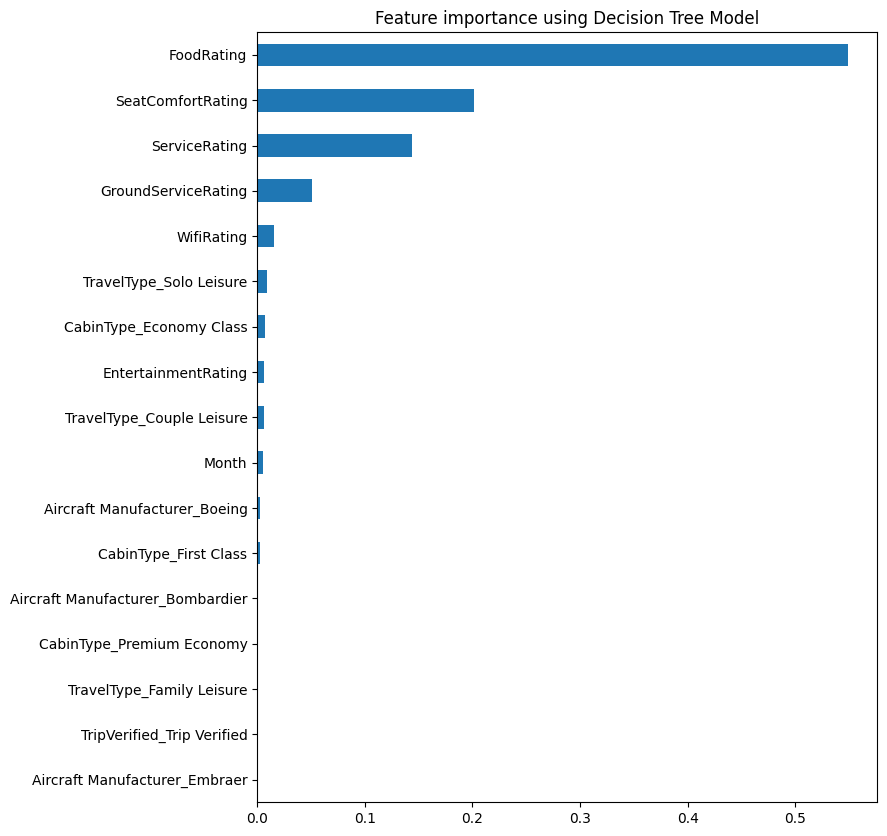

In [ ]:
coef = pd.Series(clf_dt.best_estimator_.feature_importances_, index = df_british_new.drop('Recommended', axis=1).columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Decision Tree Model")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

#params for DecisiontreeClassifier
params = {
    'C': range(10, 201, 10)
}
#run GridSearch on DecisionTree to find out the best params
clf_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=params, scoring='roc_auc', cv=10)
clf_lr.fit(X_train, y_train)

print(f"Best value of Param C : {clf_lr.best_params_['C']} has ROC accuracy of {round(clf_lr.best_score_*100, 3)}")

Best value of Param C : 40 has ROC accuracy of 95.435


<Axes: >

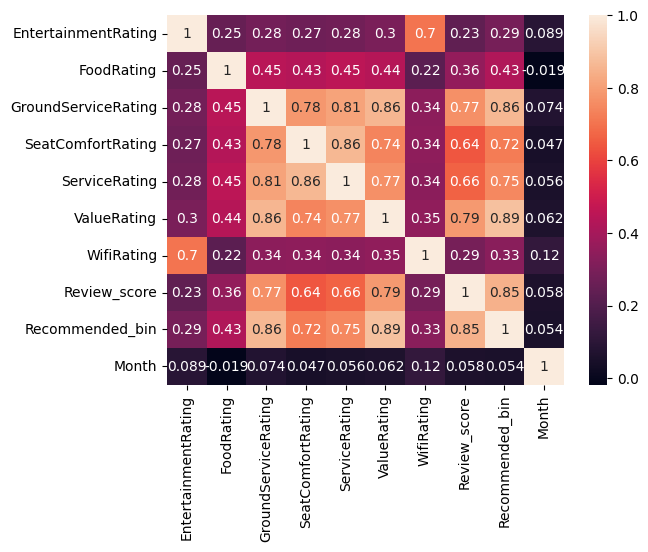

In [22]:
sns.heatmap(df_swoop.drop(columns=['OverallScore', 'Review_score_flair', 'Review_score_nltk'], axis=1).select_dtypes(include='number').corr(), annot=True)

In [23]:
from sklearn.feature_selection import mutual_info_classif
X, y = df_swoop.drop('Recommended', axis=1), df_swoop['Recommended']
mutual_info_classif(X,y)


ValueError: could not convert string to float: 'Swoop'

In [ ]:
df_swoop['Recommended_bin'] = np.where(df_swoop['Recommended'] == 'yes', 1, 0)
df_swoop.describe()

,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating,Review_score_nltk,Review_score_flair,Review_score,Recommended_bin
count,701,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,2020-07-22 20:20:11.982881536,0.462197,0.650499,1.891583,3.012839,1.834522,2.122682,2.108417,0.567760,0.380884,0.198288,0.192582,0.231098
min,2018-06-21 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-03-13 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-12-31 00:00:00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-04-21 00:00:00,1.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2023-05-07 00:00:00,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,1.038026,1.252068,1.634346,3.287831,1.527278,1.791826,1.599000,1.195247,0.485951,0.398995,0.394609,0.421836


In [ ]:
# Splitting the dataset into training and testing sets
df_swoop['Month'] = df_swoop['DatePub'].dt.month

features = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'Review_score_nltk', 'Review_score_flair', 'Review_score', 'OverallScore', 'Month']
X = df_swoop[features]  # Predictor variables
y = df_swoop['Recommended_bin']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df_swoop' is not defined

###KNN

In [ ]:
n_splits = 5
param_grid = {
    'n_neighbors' : range(1, 20)
}

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy')

In [ ]:
knn_model.best_params_, knn_model.best_score_

({'n_neighbors': 5}, 0.9892857142857142)

In [ ]:
knn_model_best = KNeighborsClassifier(**knn_model.best_params_)
knn_model_best.fit(X_train, y_train)
y_pred_knn = knn_model_best.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn).round(3)
precision_knn = precision_score(y_test, y_pred_knn).round(3)
recall_knn = recall_score(y_test, y_pred_knn).round(3)
f1_knn = f1_score(y_test, y_pred_knn).round(3)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Metrics of logistic regression: 
Accuracy: 0.986
Precision: 1.0
Recall: 0.939
F1 score: 0.969


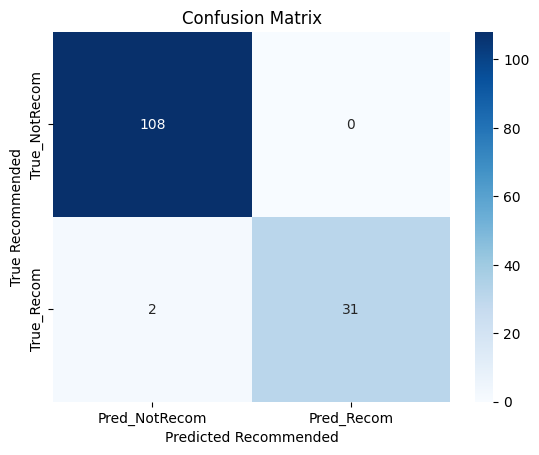

In [ ]:
print(f"Metrics of logistic regression: ")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 score: {f1_knn}")

# Create a confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred_NotRecom", "Pred_Recom"], yticklabels=["True_NotRecom", "True_Recom"])
plt.ylabel('True Recommended')
plt.xlabel('Predicted Recommended')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

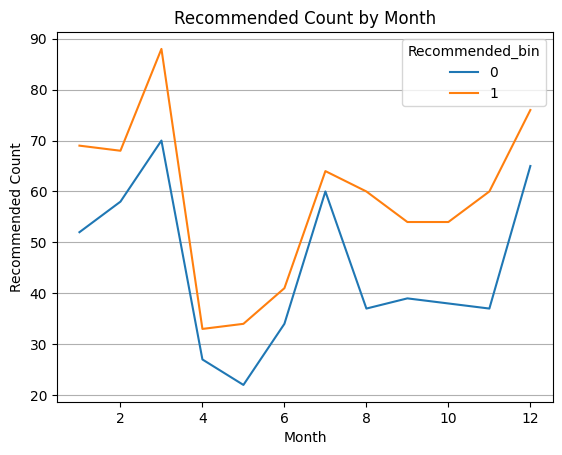

In [ ]:
grouped_df = df_swoop.groupby(['Month'])['Recommended_bin'].value_counts().unstack(fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_df.plot(stacked=True, legend=True)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Recommended Count')
plt.title('Recommended Count by Month')
# plt.xticks(grouped_df['Month'])
plt.grid(axis='y')

plt.show()

In [ ]:
df_swoop.groupby(['Month'])['Recommended_bin'].value_counts()

Month  Recommended_bin
1      0                  52
       1                  17
2      0                  58
       1                  10
3      0                  70
       1                  18
4      0                  27
       1                   6
5      0                  22
       1                  12
6      0                  34
       1                   7
7      0                  60
       1                   4
8      0                  37
       1                  23
9      0                  39
       1                  15
10     0                  38
       1                  16
11     0                  37
       1                  23
12     0                  65
       1                  11
Name: count, dtype: int64

### Logistic Regression Test

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr).round(3)
precision_lr = precision_score(y_test, y_pred_lr).round(3)
recall_lr = recall_score(y_test, y_pred_lr).round(3)
f1_lr = f1_score(y_test, y_pred_lr).round(3)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

Metrics of logistic regression: 
Accuracy: 0.986
Precision: 0.97
Recall: 0.97
F1 score: 0.97


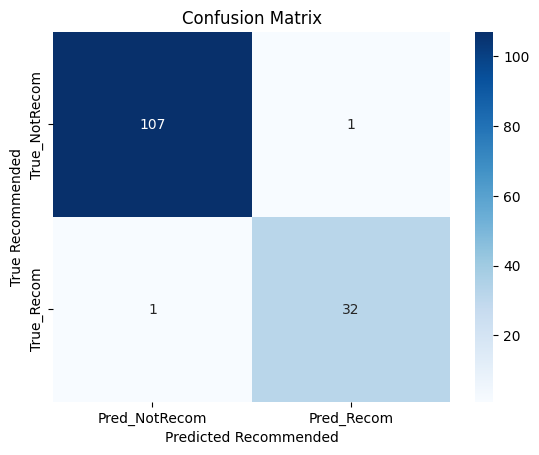

In [ ]:
print(f"Metrics of logistic regression: ")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 score: {f1_lr}")

# Create a confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred_NotRecom", "Pred_Recom"], yticklabels=["True_NotRecom", "True_Recom"])
plt.ylabel('True Recommended')
plt.xlabel('Predicted Recommended')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree test

In [ ]:
# Training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=124)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt).round(3)
precision_dt = precision_score(y_test, y_pred_dt).round(3)
recall_dt = recall_score(y_test, y_pred_dt).round(3)
f1_dt = f1_score(y_test, y_pred_dt).round(3)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)


**Try cross-val on it**

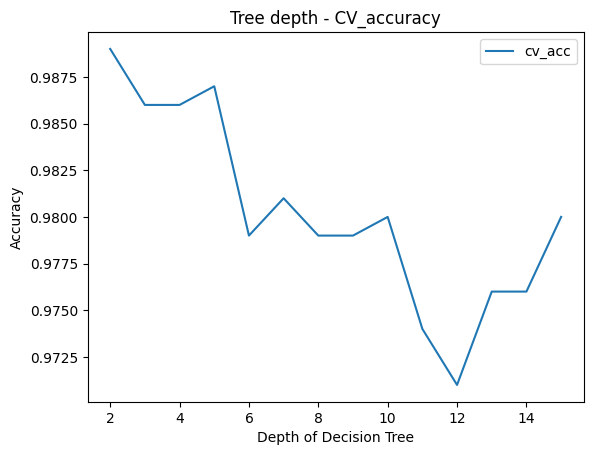

In [ ]:
max_depth = 2
max_acc = 0
depths = []
cv = []

for depth in range(2,16):
  depths.append(depth)
  decisionTree = DecisionTreeClassifier(max_depth=depth)
  cv_score = cross_val_score(decisionTree, X, y, scoring="accuracy", cv=5).mean().round(3)
  if cv_score > max_acc:
    max_acc = cv_score
    max_depth = depth
  cv.append(cv_score)

plt.plot(depths, cv, label='cv_acc')

plt.title("Tree depth - CV_accuracy")
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(f"Depth of {max_depth} has the higest mean accuracy of {max_acc}.")

Depth of 3 has the higest mean accuracy of 0.99.


## Conclusion so far
In the model tinkering phase, decision tree has the best accuracy out of all. However, in order to serve our business goal of predicting the customers recommedend probability, we will use logistic regression.

## Predict Churning Rate

In [ ]:
# Splitting the dataset into training and testing sets
features = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'Review_score_nltk', 'Review_score', 'OverallScore']
X = df_swoop[features]  # Predictor variables
y = df_swoop['Recommended_bin']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# y_pred_lr = lr_model.predict(X_test)
probabilities = lr_model.predict_proba(X)[:, 1]  # Get probabilities for the positive class

Binned
[0.0, 0.1)    529
[0.1, 0.2)      7
[0.2, 0.3)      4
[0.3, 0.4)      1
[0.4, 0.5)      1
[0.5, 0.6)      0
[0.6, 0.7)      2
[0.7, 0.8)      1
[0.8, 0.9)      2
[0.9, 1.0)    154
Name: count, dtype: int64


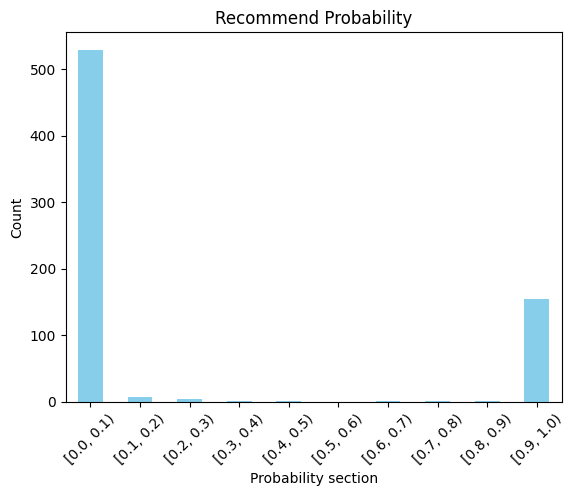

In [ ]:
prob_df = pd.DataFrame(probabilities, columns=['Probabilities'])

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

prob_df['Binned'] = pd.cut(prob_df['Probabilities'], bins=bins, right=False)

# Count values in each bin
bin_counts = prob_df['Binned'].value_counts().sort_index()

# Display the counts for each bin
print(bin_counts)
# Plot the counts for each bin
bin_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Recommend Probability')
plt.xlabel('Probability section')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to fit them better

# Show the plot
plt.show()

## Problem
We've found that the "Not Recommended" customers are not close to the Threshold(Let's assume 0.7 on "Recommended") in terms of probablity, but very far back, mostly the probability is less than 0.1, so that even if they are offered, it is likely that they'll turn down the offer.
**Why "Recommended" prediction are so polarized?**

In [ ]:

knn_model_best.fit(X_train, y_train)

# y_pred_lr = lr_model.predict(X_test)
probabilities = knn_model_best.predict_proba(X)[:, 1]  # Get probabilities for the positive class
# probabilities

Binned
[0.0, 0.1)    522
[0.1, 0.2)      0
[0.2, 0.3)     18
[0.3, 0.4)      0
[0.4, 0.5)      5
[0.5, 0.6)      0
[0.6, 0.7)      3
[0.7, 0.8)      0
[0.8, 0.9)      1
[0.9, 1.0)      0
Name: count, dtype: int64


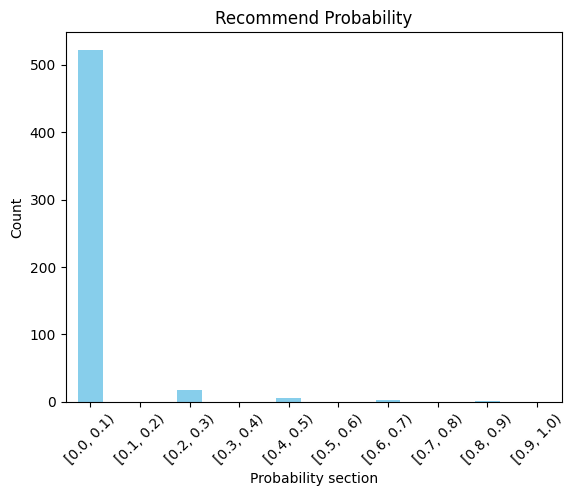

In [ ]:
prob_df = pd.DataFrame(probabilities, columns=['Probabilities'])

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

prob_df['Binned'] = pd.cut(prob_df['Probabilities'], bins=bins, right=False)

# Count values in each bin
bin_counts = prob_df['Binned'].value_counts().sort_index()

# Display the counts for each bin
print(bin_counts)
# Plot the counts for each bin
bin_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Recommend Probability')
plt.xlabel('Probability section')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to fit them better

# Show the plot
plt.show()

In [ ]:
df_british.columns

Index(['AirlineName', 'CabinType', 'DateFlown', 'DatePub',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Review', 'Route',
       'SeatComfortRating', 'ServiceRating', 'Slug', 'Title', 'TravelType',
       'TripVerified', 'ValueRating', 'WifiRating', 'unique_id',
       'Aircraft Manufacturer', 'Route_Departure', 'Route_Destination',
       'Month'],
      dtype='object')

## British Airways

In [ ]:

df_british = df[df['AirlineName']=='British Airways']

df_british['Recommended'] = np.where(df_british['Recommended'] == 'yes', 1, 0)

<ipython-input-196-02d6a1ca5799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_british['Recommended'] = np.where(df_british['Recommended'] == 'yes', 1, 0)


## Dummy Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(df_british.drop('Recommended', axis=1), df_british['Recommended'], test_size=0.3, random_state=42)
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

In [ ]:
accuracy_score(dummy_pred, y_test)

0.6148007590132827

## Positive v/s Negative Class

In [ ]:
# help(y_train.value_counts().plot)

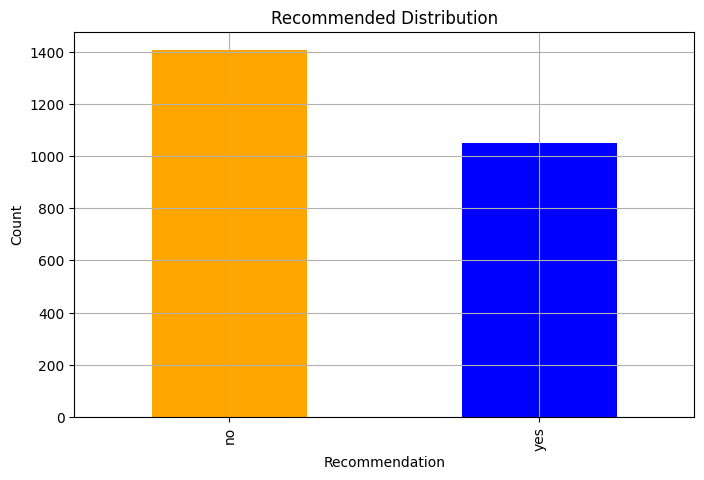

In [ ]:
plt.figure(figsize=(8, 5))
y_train.map({0: 'no', 1:'yes'}).value_counts().plot(x=['no', 'yes'], kind='bar', color=['orange', 'blue'], xlabel='Recommendation', ylabel='Count')
plt.title("Recommended Distribution")
plt.grid()
plt.show()

## Data Wrangling

In [ ]:
df_british['Month'] = pd.to_datetime(df_british['DatePub']).dt.month

# rating_col = ["SeatComfortRating", "WifiRating", "ValueRating", "ServiceRating", "GroundServiceRating", "FoodRating", "EntertainmentRating", "OverallScore"]
df_british_new = df_british.drop(['Route_Departure', 'Route_Destination', 'OriginCountry', 'Route', 'unique_id', 'Title', 'Review', 'OverallScore', 'ValueRating', 'DatePub',  'DateFlown'] , axis=1)
# df_british_new = pd.get_dummies(df_british_new,  drop_first=True, dtype='int')

<ipython-input-216-5dd0404aec66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_british['Month'] = pd.to_datetime(df_british['DatePub']).dt.month


In [ ]:
df_british_new.columns

Index(['AirlineName', 'CabinType', 'EntertainmentRating', 'FoodRating',
       'GroundServiceRating', 'Recommended', 'SeatComfortRating',
       'ServiceRating', 'Slug', 'TravelType', 'TripVerified', 'WifiRating',
       'Aircraft Manufacturer', 'Month'],
      dtype='object')

<Axes: >

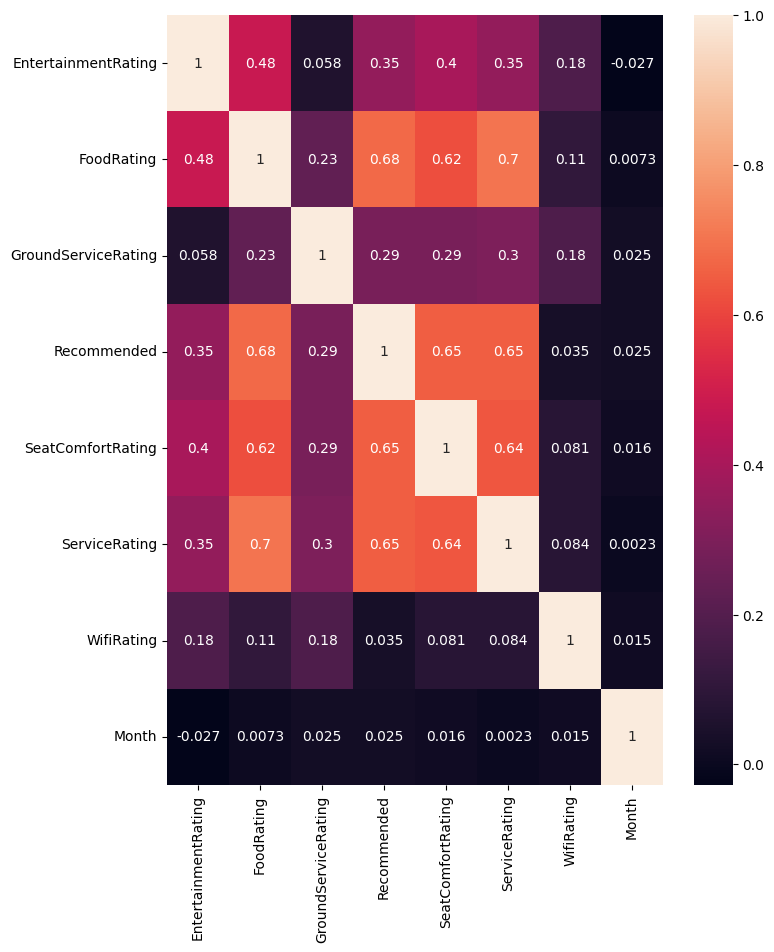

In [ ]:
sns.heatmap(df_british_new.select_dtypes(include='number').corr(), annot=True)

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", truncation=True)
def get_score(text):
    sentence = sentiment_pipeline(text)
    return 1 if sentence[0]['label'] =='POSITIVE' else 0

df_british_new['Review_score'] = df_british['Review'].apply(get_score)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
from sklearn.feature_selection import mutual_info_classif
X, y = df_britsh_new.drop('Recommended', axis=1), df_british_new['Recommended']
mutual_info_classif(df_british)


## Recommended count distribution against Month

<Figure size 1000x600 with 0 Axes>

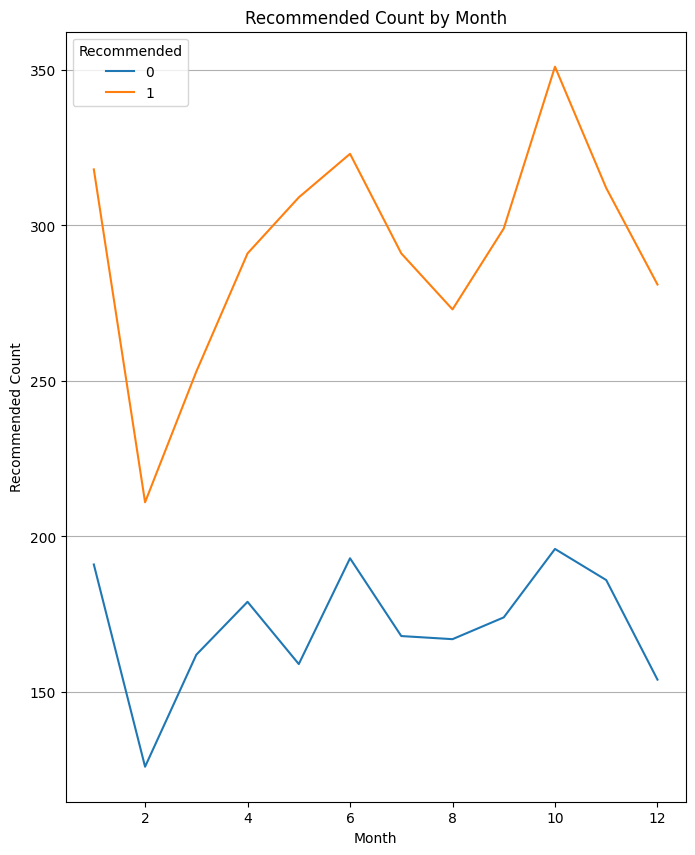

In [ ]:
grouped_df = df_british.groupby(['Month'])['Recommended'].value_counts().unstack(fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_df.plot(stacked=True, legend=True)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Recommended Count')
plt.title('Recommended Count by Month')
# plt.xticks(grouped_df['Month'])
plt.grid(axis='y')

plt.show()

## KNN Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_british_new.drop('Recommended', axis=1), df_british_new['Recommended'].values, test_size=0.3, random_state=42)


In [ ]:
n_splits = 5
param_grid = {
    'n_neighbors' : range(1, 20)
}

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
knn_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'British Airways'

In [ ]:
knn_model.best_params_, knn_model.best_score_

({'n_neighbors': 15}, 0.8966701438908483)

In [ ]:
knn_model_best = KNeighborsClassifier(**knn_model.best_params_)
knn_model_best.fit(X_train, y_train)
accuracy_score(y_test, knn_model_best.predict(X_test))

0.8889943074003795

In [ ]:
(knn_model_best.predict(X_test)==1).sum()

415

Binned
[0.0, 0.1)    246
[0.1, 0.2)     41
[0.2, 0.3)     52
[0.3, 0.4)     22
[0.4, 0.5)     54
[0.5, 0.6)     21
[0.6, 0.7)     54
[0.7, 0.8)     25
[0.8, 0.9)    116
[0.9, 1.0)    123
Name: count, dtype: int64


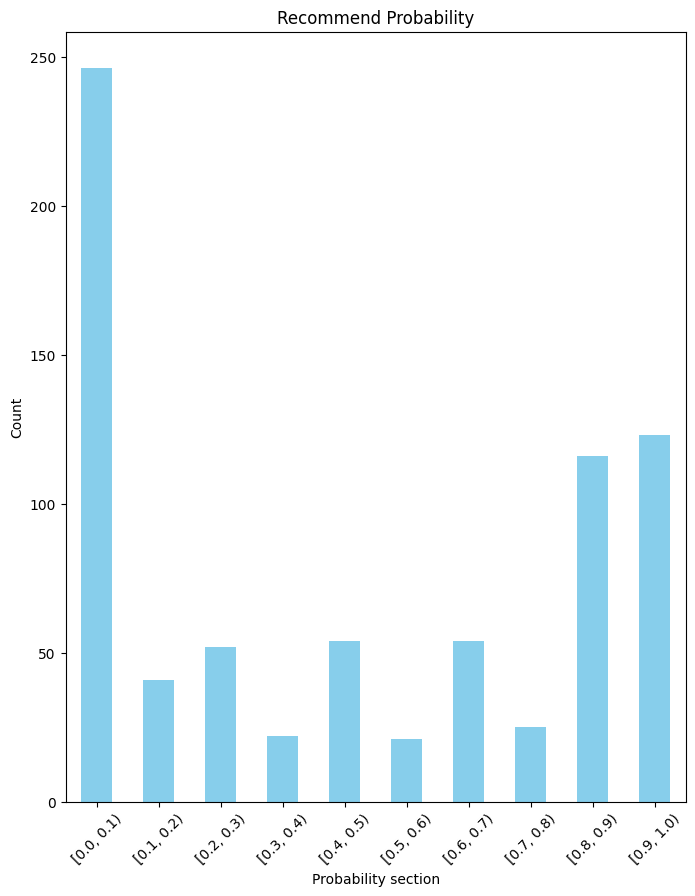

In [ ]:
probabilities = knn_model_best.predict_proba(X_test)[:, 0]  # Get probabilities for the positive class
# probabilities

prob_df = pd.DataFrame(probabilities, columns=['Probabilities'])

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

prob_df['Binned'] = pd.cut(prob_df['Probabilities'], bins=bins, right=False)

# Count values in each bin
bin_counts = prob_df['Binned'].value_counts().sort_index()

# Display the counts for each bin
print(bin_counts)
# Plot the counts for each bin
bin_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Recommend Probability')
plt.xlabel('Probability section')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to fit them better

# Show the plot
plt.show()

## Handle Data imbalance

In [ ]:
positive_class = df_british_new.query('Recommended==1')
negative_class = df_british_new.query('Recommended==0').sample(len(positive_class))

In [ ]:
positive_class

,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,WifiRating,Month,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,TripVerified_Trip Verified,Aircraft Manufacturer_Boeing,Aircraft Manufacturer_Bombardier,Aircraft Manufacturer_Embraer
30875,3,4,4,1,4,5,0,4,0,0,1,0,0,1,1,0,0,0
30886,0,5,3,1,5,5,0,4,0,0,0,0,0,1,1,0,0,0
30890,0,3,4,1,4,4,0,4,1,0,0,1,0,0,1,0,0,0
30894,5,3,4,1,4,5,5,3,1,0,0,0,0,1,1,1,0,0
30901,4,3,1,1,3,1,2,3,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34400,4,3,0,1,4,3,0,8,0,0,1,0,0,1,1,0,0,0
34401,4,2,0,1,4,3,0,8,0,0,0,0,0,1,1,0,0,0
34402,0,5,0,1,5,5,0,8,1,0,0,0,0,1,1,1,0,0
34403,0,4,0,1,4,5,0,8,0,0,0,0,0,1,1,0,0,0


In [ ]:
df_final = pd.concat([positive_class, negative_class], axis=0)

## Normalize Data and Split into Train Test

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

scaler = StandardScaler()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('Recommended', axis=1), df_final['Recommended'].values, test_size=0.3, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.14037519, -0.39264637,  1.51536502, ..., -1.05808441,
        -0.08314794, -0.13780604],
       [-1.14037519, -1.6377567 , -1.24439675, ...,  0.94510418,
        -0.08314794, -0.13780604],
       [ 1.74380369,  0.85246397, -1.24439675, ..., -1.05808441,
        -0.08314794, -0.13780604],
       ...,
       [ 0.59013214,  0.85246397, -1.24439675, ..., -1.05808441,
        -0.08314794, -0.13780604],
       [ 1.74380369,  1.47501913, -1.24439675, ...,  0.94510418,
        -0.08314794, -0.13780604],
       [ 1.16696792, -1.6377567 ,  0.96341267, ..., -1.05808441,
        -0.08314794, -0.13780604]])

## KNN -- Baseline Model ?

In [ ]:
n_splits = 5
param_grid = {
    'n_neighbors' : range(1, 20)
}

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy')

In [ ]:
knn_model.best_params_, knn_model.best_score_

({'n_neighbors': 16}, 0.8759225803343451)

In [ ]:
len(positive_class)

1457

In [ ]:
knn_model_best = KNeighborsClassifier(**knn_model.best_params_)
knn_model_best.fit(X_train, y_train)
accuracy_score(y_test, knn_model_best.predict(X_test))

0.8822857142857143

In [ ]:
(knn_model_best.predict(X_test)==1).sum()

455

Binned
[0.0, 0.1)    213
[0.1, 0.2)    108
[0.2, 0.3)     41
[0.3, 0.4)     60
[0.4, 0.5)     33
[0.5, 0.6)     55
[0.6, 0.7)     63
[0.7, 0.8)     28
[0.8, 0.9)    104
[0.9, 1.0)     69
Name: count, dtype: int64


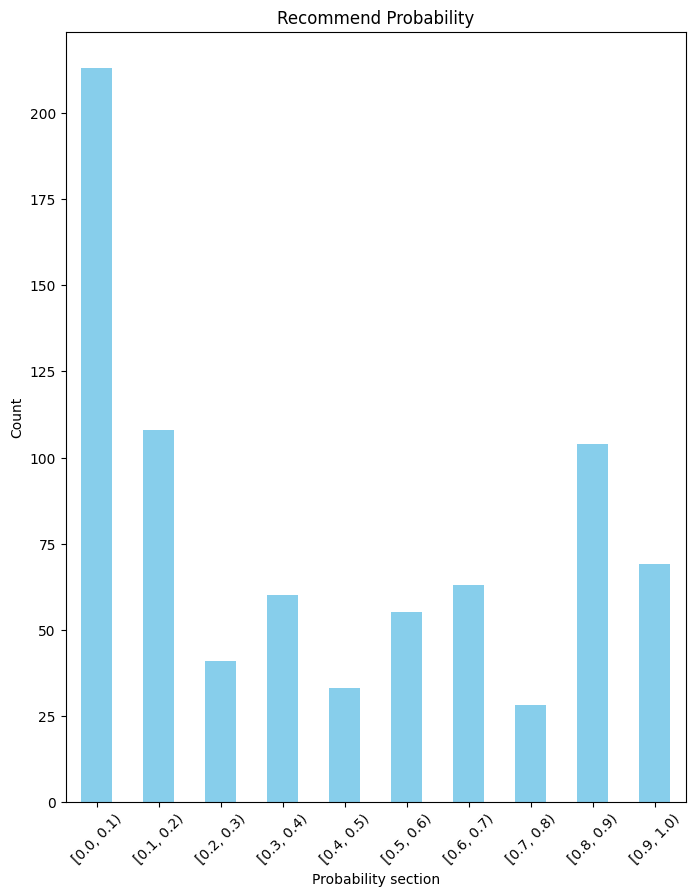

In [ ]:
probabilities = knn_model_best.predict_proba(X_test)[:, 0]  # Get probabilities for the positive class
# probabilities

prob_df = pd.DataFrame(probabilities, columns=['Probabilities'])

bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

prob_df['Binned'] = pd.cut(prob_df['Probabilities'], bins=bins, right=False)

# Count values in each bin
bin_counts = prob_df['Binned'].value_counts().sort_index()

# Display the counts for each bin
print(bin_counts)
# Plot the counts for each bin
bin_counts.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Recommend Probability')
plt.xlabel('Probability section')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to fit them better

# Show the plot
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df_british_new.drop('Recommended', axis=1), df_british_new['Recommended'].values, test_size=0.3, random_state=42)


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

#params for DecisiontreeClassifier
params = {
    'min_samples_leaf': range(10, 201, 10)
}
#run GridSearch on DecisionTree to find out the best params
clf_dt = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), param_grid=params, scoring='roc_auc', cv=10)
clf_dt.fit(X_train, y_train)

print(f"Best value of Param C : {clf_dt.best_params_['min_samples_leaf']} has ROC accuracy of {round(clf_dt.best_score_*100, 3)}")

Best value of Param C : 20 has ROC accuracy of 93.23


In [ ]:
clf_dt.best_estimator_.feature_importances_

array([0.00665416, 0.54871622, 0.05100756, 0.20116121, 0.14369048,
       0.01601673, 0.00528831, 0.00683573, 0.00236135, 0.        ,
       0.00655687, 0.        , 0.00903594, 0.        , 0.00267544,
       0.        , 0.        ])

### Precision /Recall Curve

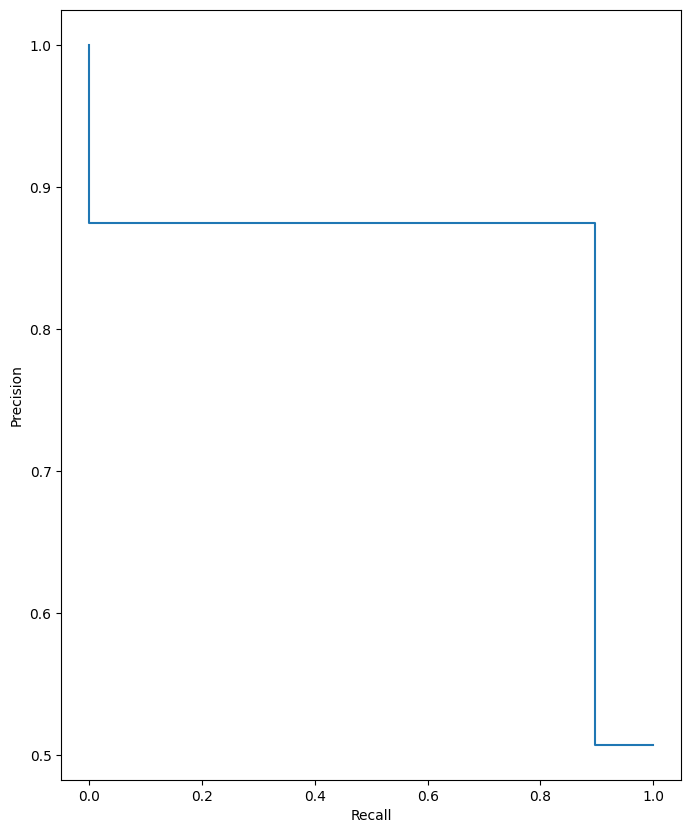

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, knn_model_best.predict(X_test))
# recall = recall_score(y_test, knn_model_best.predict(X_test))

disp = PrecisionRecallDisplay(precision, recall)
disp.plot()
# plt.show()

Text(0.5, 1.0, 'Feature importance using Decision Tree Model')

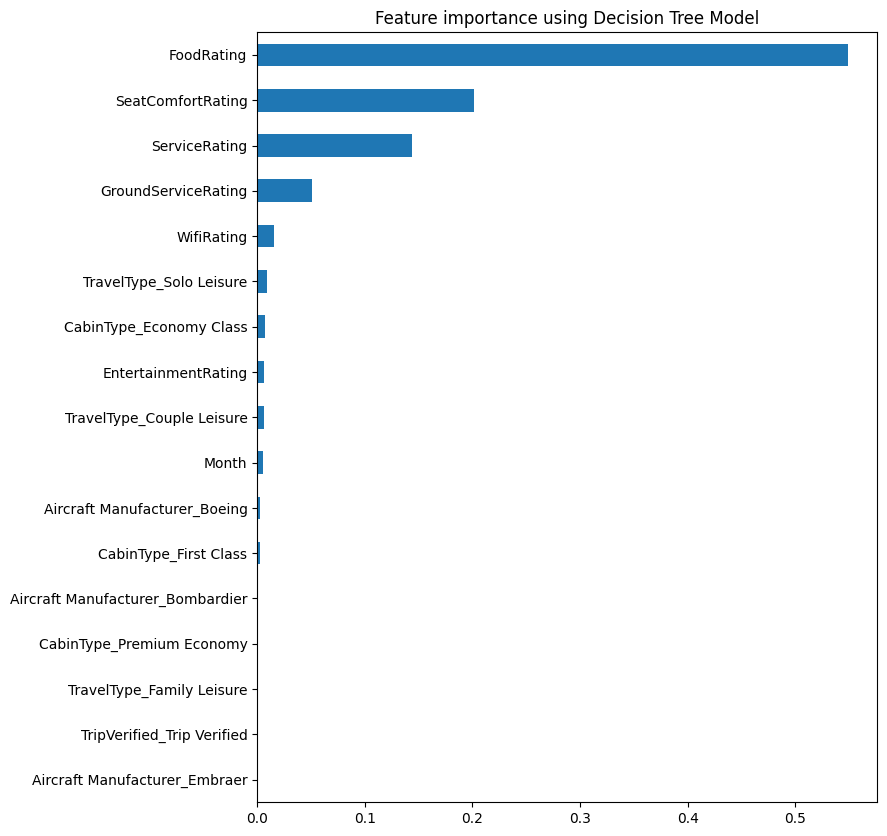

In [ ]:
coef = pd.Series(clf_dt.best_estimator_.feature_importances_, index = df_british_new.drop('Recommended', axis=1).columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Decision Tree Model")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

#params for DecisiontreeClassifier
params = {
    'C': range(10, 201, 10)
}
#run GridSearch on DecisionTree to find out the best params
clf_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=params, scoring='roc_auc', cv=10)
clf_lr.fit(X_train, y_train)

print(f"Best value of Param C : {clf_lr.best_params_['C']} has ROC accuracy of {round(clf_lr.best_score_*100, 3)}")

Best value of Param C : 40 has ROC accuracy of 95.435
